In [1]:
pip install anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 5.4 MB/s eta 0:00:00


#**IMPORT LIBRARY**

In [2]:
from google.colab import drive

# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, linregress

# Machine Learning Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import glob
import os

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**LOAD DATASET**

###Dataset Anggota Tim

In [4]:
# Try tab-separated (common for some exports)
df_table_member = pd.read_csv('/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/anggota-fasilitator.csv', sep=';')
print("Loaded with tab separator:")
display(df_table_member.head())

Loaded with tab separator:


,No,Batch,Lokus,Anggota 1,Anggota 2,Anggota 3,Anggota 4,Anggota 5
0,1,1.10,SD.Kab.Ciamis.3,"Ir. Heni Sulastri, S.T., M.T","Neng Ika Kurniati, S.Si., M.Cs.",Muhamad Kaila Putra Julianto,Muhammad Alif Akhdan Tsani,Muhammad Azfa Huwaiza Al Aflah
1,2,1.20,SD.Kab.Ciamis.4,"Ratna Rustina, M.Pd","Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",Shofi Nurul Aini,Christine Angelica Soeharyanto,Farhan Esha Putra Kusuma Atmaja
2,3,1.30,SD.Kab.Ciamis.5,"Agus Supriatman, S.T., M.Kom.","Hilman Mutaqin, S.T., M.Kom.","Dimas Adisa Suryatama, S.Pd",Lauren Nugraha,Novarianda saputra
3,4,1.40,SMA.SMK.Kab.Ciamis.1,"Dr. Ir. R. Reza El Akbar., S.Si., M.T., M.Kom","Agus Maulani, S.Sn","Reva Arya Maulana, RHCSA, CND, ECIH.","Rizki Pratama, CND., ECIH",Ali Astra Mikail
4,5,1.50,SMP.Kab.Ciamis.1,"Dr. Ir. Eka Wahyu Hidayat, ST., MT., MCE","Robby Maududy, S.Pd., M. Kom",Muhamad Aditya Darmawan,Farhan Sabani,Muhamad Ali Murtadho


##Dataset Kelulusan

In [5]:

# Load and concatenate df_kelulusan
kelulusan_folder_path = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/laporan-akhir-lokus-kka-ysic'

all_files = os.listdir(kelulusan_folder_path)
csv_files = [f for f in all_files if f.endswith('.csv')]

list_df = []

for csv_file in csv_files:
    file_path = os.path.join(kelulusan_folder_path, csv_file)
    df = pd.read_csv(file_path)
    list_df.append(df)

df_kelulusan = pd.concat(list_df, ignore_index=True)
print("\ndf_kelulusan loaded and concatenated successfully:")
display(df_kelulusan.head())


df_kelulusan loaded and concatenated successfully:


,User ID,Email,Nama,Program Local Name,Kelas Name,PP Score,Presensi Score,Canvas Score,Total Score,Predikat,Status Nilai,Nilai Prasyarat Sertifikat,Status Prasyarat Sertifikat,Flag Sertifikat,Status Kelulusan
0,V0Bj21oo0Z,aannuraeni12@guru.sd.belajar.id,AAN NURAENI,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,87.16,87.16,Baik,Lulus,0,NaN,True,Lulus
1,qo68WAmb0a,abdulrosid68@guru.sd.belajar.id,ABDUL ROSID,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.94,85.94,Baik,Lulus,0,NaN,True,Lulus
2,J61gO4KE97,adinur77@guru.sd.belajar.id,ADI MUHAROM NUR,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,86.05,86.06,Baik,Lulus,0,NaN,True,Lulus
3,OyDOd1Kw9X,aditardinda44@guru.sd.belajar.id,ADI TARDINDA,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.84,85.85,Baik,Lulus,0,NaN,True,Lulus
4,50ZOQBMN6m,agus988@guru.sd.belajar.id,AGUS JAJAT JATMIHA,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,84.27,84.28,Baik,Lulus,0,NaN,True,Lulus


## Load Penilaian HR

In [6]:
# Load HR evaluation data
df_hr = pd.read_excel('/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/Penilaian HR Real.xlsx')

# Standardize column names
df_hr = df_hr.rename(columns={
    'Nilai': 'Nilai_HR',
    'Keterangan/Alasan': 'Keterangan_HR'
})

In [7]:
# Keep only necessary columns
df_hr = df_hr[['ID', 'Nama', 'Nilai_HR']]

In [8]:
df_hr.head()

,ID,Nama,Nilai_HR
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",90
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",90
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",88
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",88


In [9]:
print("Missing values in df_hr:")
print(df_hr.isnull().sum())

Missing values in df_hr:
ID          0
Nama        0
Nilai_HR    0
dtype: int64


In [10]:
df_hr.shape

(32, 3)

## **Load Penilaian AI**

In [11]:
# Define folder containing AI evaluation files
AI_FOLDER = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/Penilaian AI'

# Get all Excel files in the folder
ai_files = glob.glob(os.path.join(AI_FOLDER, '*.xlsx'))

print(f"Found {len(ai_files)} AI evaluation files:")
for f in ai_files:
    print(f"  - {os.path.basename(f)}")

Found 5 AI evaluation files:
  - ChatGPT.5.2.xlsx
  - Claude Sonnet 4.5.xlsx
  - Deep Seek V3.2.xlsx
  - Gemini 3 pro.xlsx
  - GLM 4.7.xlsx


In [12]:
# Load and combine all AI data
ai_dataframes = []

for file_path in ai_files:
    # Extract platform name from filename
    platform_name = os.path.basename(file_path).replace('.xlsx', '')

    # Load data
    df_temp = pd.read_excel(file_path)

    # Standardize columns
    # Check if column exists (handle different naming)
    if 'Nilai AI' in df_temp.columns:
        df_temp = df_temp.rename(columns={'Nilai AI': 'Nilai_AI'})
    elif 'Nilai' in df_temp.columns:
        df_temp = df_temp.rename(columns={'Nilai': 'Nilai_AI'})

    # Add platform identifier
    df_temp['Platform'] = platform_name

    # Keep only necessary columns
    df_temp = df_temp[['ID', 'Nama', 'Nilai_AI', 'Platform','Waktu']]

    ai_dataframes.append(df_temp)

    print(f"\n{platform_name}:")
    print(f"  Shape: {df_temp.shape}")
    print(f"  Nilai AI range: {df_temp['Nilai_AI'].min():.1f} - {df_temp['Nilai_AI'].max():.1f}")


ChatGPT.5.2:
  Shape: (32, 5)
  Nilai AI range: 88.0 - 96.0

Claude Sonnet 4.5:
  Shape: (32, 5)
  Nilai AI range: 85.0 - 98.0

Deep Seek V3.2:
  Shape: (32, 5)
  Nilai AI range: 89.0 - 98.0

Gemini 3 pro:
  Shape: (32, 5)
  Nilai AI range: 91.0 - 98.0

GLM 4.7:
  Shape: (32, 5)
  Nilai AI range: 94.0 - 98.0


In [13]:
# Combine all AI data
df_ai_all = pd.concat(ai_dataframes, ignore_index=True)

print(f"\n{'='*60}")
print(f"Total AI evaluations: {len(df_ai_all)} rows")
print(f"Platforms: {df_ai_all['Platform'].unique().tolist()}")
print(f"\nSample of combined data:")
display(df_ai_all.head(10))


Total AI evaluations: 160 rows
Platforms: ['ChatGPT.5.2', 'Claude Sonnet 4.5', 'Deep Seek V3.2', 'Gemini 3 pro', 'GLM 4.7']

Sample of combined data:


,ID,Nama,Nilai_AI,Platform,Waktu
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,ChatGPT.5.2,00:04.13
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,ChatGPT.5.2,00:02.03
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",96.00,ChatGPT.5.2,00:04.19
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,ChatGPT.5.2,00:03.20
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",95.00,ChatGPT.5.2,00:03.54
5,FKKA-06,"Evi Dewi Sri Mulyani, M.Kom",93.00,ChatGPT.5.2,00:01.85
6,FKKA-07,"Ratna Rustina, M.Pd",90.00,ChatGPT.5.2,00:01.67
7,FKKA-08,"Neng Ika Kurniati, S.Si., M.Cs.",94.00,ChatGPT.5.2,00:02.56
8,FKKA-09,"Shinta Siti Sundari, M.Kom",92.00,ChatGPT.5.2,00:01.89
9,FKKA-10,"Robby Maududy, S.Pd., M.Kom",94.00,ChatGPT.5.2,00:01.60


#**PEPROCESSING**

In [14]:
#Melihat Value Pada Kolom Program Local Name

print("Unique values in 'Program Local Name' from df_kelulusan:")
print(df_kelulusan['Program Local Name'].unique())

Unique values in 'Program Local Name' from df_kelulusan:
['[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Ciamis.3'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Tasikmalaya.5'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Tasikmalaya.3'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Ciamis.1'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Tasikmalaya.6'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kota.Tasikmalaya.1'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Ciamis.1'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Tasikmalaya.2'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Garut.5'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Garut.4'
 '[FASE D] KKA - LPD Yayasan Sakata Innovation Center - SMP.Kab.Ciamis.2'
 '[FASE C] KKA - LPD Yayasan Sakata Innovation Center - SD.Kab.Ciamis.2'
 '[FASE D] KKA - LPD Yayasan Sakata I

In [15]:
# Mengganti Value pada Program Local Name menjadi Hanya nama Lokus
df_kelulusan['Program Local Name'] = df_kelulusan['Program Local Name'].str.split(' - ').str[-1]
print("Updated unique values in 'Program Local Name' from df_kelulusan:")
print(df_kelulusan['Program Local Name'].unique())
display(df_kelulusan.head())

Updated unique values in 'Program Local Name' from df_kelulusan:
['SD.Kab.Ciamis.3' 'SD.Kab.Tasikmalaya.5' 'SMP.Kab.Tasikmalaya.3'
 'SD.Kab.Ciamis.1' 'SD.Kab.Tasikmalaya.6' 'SD.Kota.Tasikmalaya.1'
 'SMP.Kab.Ciamis.1' 'SMP.Kab.Tasikmalaya.2' 'SMP.Kab.Garut.5'
 'SMP.Kab.Garut.4' 'SMP.Kab.Ciamis.2' 'SD.Kab.Ciamis.2'
 'SMP.Kab.Tasikmalaya.1' 'SMP.Kota.Tasikmalaya.1' 'SD.Kota.Tasikmalaya.2'
 'SD.Kab.Tasikmalaya.4' 'SD.Kab.Ciamis.5' 'SMP.Kab.Garut.3'
 'SMA.SMK.Kab.Ciamis.1' 'SMA.SMK.Kota.Tasikmalaya.1'
 'SMA.Kab.Tasikmalaya.1' 'SD.Kab.Ciamis.4']


,User ID,Email,Nama,Program Local Name,Kelas Name,PP Score,Presensi Score,Canvas Score,Total Score,Predikat,Status Nilai,Nilai Prasyarat Sertifikat,Status Prasyarat Sertifikat,Flag Sertifikat,Status Kelulusan
0,V0Bj21oo0Z,aannuraeni12@guru.sd.belajar.id,AAN NURAENI,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,87.16,87.16,Baik,Lulus,0,NaN,True,Lulus
1,qo68WAmb0a,abdulrosid68@guru.sd.belajar.id,ABDUL ROSID,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.94,85.94,Baik,Lulus,0,NaN,True,Lulus
2,J61gO4KE97,adinur77@guru.sd.belajar.id,ADI MUHAROM NUR,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,86.05,86.06,Baik,Lulus,0,NaN,True,Lulus
3,OyDOd1Kw9X,aditardinda44@guru.sd.belajar.id,ADI TARDINDA,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.84,85.85,Baik,Lulus,0,NaN,True,Lulus
4,50ZOQBMN6m,agus988@guru.sd.belajar.id,AGUS JAJAT JATMIHA,SD.Kab.Ciamis.3,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,84.27,84.28,Baik,Lulus,0,NaN,True,Lulus


#**DATA CLEANING**

In [16]:
columns_to_drop = ['Email', 'Kelas Name', 'Nilai Prasyarat Sertifikat', 'Status Prasyarat Sertifikat', 'Flag Sertifikat', 'PP Score', 'Presensi Score', 'Status Nilai']
df_kelulusan = df_kelulusan.drop(columns=columns_to_drop, errors='ignore')
print(f"Columns {columns_to_drop} have been removed from df_kelulusan.")
display(df_kelulusan.head())

Columns ['Email', 'Kelas Name', 'Nilai Prasyarat Sertifikat', 'Status Prasyarat Sertifikat', 'Flag Sertifikat', 'PP Score', 'Presensi Score', 'Status Nilai'] have been removed from df_kelulusan.


,User ID,Nama,Program Local Name,Canvas Score,Total Score,Predikat,Status Kelulusan
0,V0Bj21oo0Z,AAN NURAENI,SD.Kab.Ciamis.3,87.16,87.16,Baik,Lulus
1,qo68WAmb0a,ABDUL ROSID,SD.Kab.Ciamis.3,85.94,85.94,Baik,Lulus
2,J61gO4KE97,ADI MUHAROM NUR,SD.Kab.Ciamis.3,86.05,86.06,Baik,Lulus
3,OyDOd1Kw9X,ADI TARDINDA,SD.Kab.Ciamis.3,85.84,85.85,Baik,Lulus
4,50ZOQBMN6m,AGUS JAJAT JATMIHA,SD.Kab.Ciamis.3,84.27,84.28,Baik,Lulus


In [17]:
print("Checking for null values in df_kelulusan:")
print(df_kelulusan.isnull().sum())

print("\nChecking for duplicate rows in df_kelulusan:")
print(df_kelulusan.duplicated().sum())

Checking for null values in df_kelulusan:
User ID               0
Nama                  0
Program Local Name    0
Canvas Score          0
Total Score           0
Predikat              0
Status Kelulusan      0
dtype: int64

Checking for duplicate rows in df_kelulusan:
0


### Data Cleaning AI Generate

In [18]:
print("Unique values in 'Platform':")
print(df_ai_all['Platform'].unique())

Unique values in 'Platform':
['ChatGPT.5.2' 'Claude Sonnet 4.5' 'Deep Seek V3.2' 'Gemini 3 pro'
 'GLM 4.7']


In [19]:
print("Missing values in df_ai_all:")
print(df_ai_all.isnull().sum())

Missing values in df_ai_all:
ID           0
Nama         0
Nilai_AI    25
Platform     0
Waktu       25
dtype: int64


In [20]:
# Check initial state
print(f"\nOriginal rows: {len(df_ai_all)}")
print("\nMissing values sebelum cleaning:")
print(df_ai_all[['ID', 'Nama', 'Platform', 'Nilai_AI', 'Waktu']].isnull().sum())


Original rows: 160

Missing values sebelum cleaning:
ID           0
Nama         0
Platform     0
Nilai_AI    25
Waktu       25
dtype: int64


In [21]:
# Step 1: Remove rows with missing values in 'Nama'
df_ai_all_cleaned = df_ai_all.dropna(subset=['Nama']).copy()
print(f"\nSetelah drop missing 'Nama': {len(df_ai_all_cleaned)} rows")


Setelah drop missing 'Nama': 160 rows


In [22]:
# Step 2: Check missing values per Platform
print("\n" + "-"*80)
print("Missing 'Nilai_AI' per Platform:")
print("-"*80)
missing_by_platform = df_ai_all_cleaned.groupby('Platform').agg({
    'Nilai_AI': lambda x: x.isnull().sum()
})
print(missing_by_platform)


--------------------------------------------------------------------------------
Missing 'Nilai_AI' per Platform:
--------------------------------------------------------------------------------
                   Nilai_AI
Platform                   
ChatGPT.5.2               5
Claude Sonnet 4.5         5
Deep Seek V3.2            5
GLM 4.7                   5
Gemini 3 pro              5


In [23]:
# Step 3: Fill missing 'Nilai_AI' with MODE per Platform
def fill_with_mode(group):
    """
    Fill missing values dengan modus (nilai paling sering muncul)
    Fallback ke median jika tidak ada modus
    """
    # Hitung missing
    n_missing = group.isna().sum()

    if n_missing == 0:
        return group

    # Ambil nilai non-null
    non_null_values = group.dropna()

    if len(non_null_values) == 0:
        return group

    # Cari modus
    mode_values = non_null_values.mode()

    if len(mode_values) > 0:
        fill_value = mode_values.iloc[0]
        method = "modus"
    else:
        # Fallback ke median jika semua nilai unik
        fill_value = non_null_values.median()
        method = "median"

    print(f"  {group.name}: {n_missing} missing → filled with {fill_value:.2f} ({method})")

    return group.fillna(fill_value)

# Apply imputasi
df_ai_all_cleaned['Nilai_AI'] = df_ai_all_cleaned.groupby('Platform')['Nilai_AI'].transform(fill_with_mode)

# Verify Nilai_AI
nilai_ai_missing = df_ai_all_cleaned['Nilai_AI'].isnull().sum()
print(f"\nMissing 'Nilai_AI' setelah imputasi: {nilai_ai_missing}")

  ChatGPT.5.2: 5 missing → filled with 92.00 (modus)
  Claude Sonnet 4.5: 5 missing → filled with 93.00 (modus)
  Deep Seek V3.2: 5 missing → filled with 95.00 (modus)
  GLM 4.7: 5 missing → filled with 98.00 (modus)
  Gemini 3 pro: 5 missing → filled with 98.00 (modus)

Missing 'Nilai_AI' setelah imputasi: 0


In [24]:
# Step 4: Handle missing 'Waktu' - fill with mode or drop
waktu_missing = df_ai_all_cleaned['Waktu'].isnull().sum()
print(f"\n" + "-"*80)
print(f"Missing 'Waktu': {waktu_missing}")

if waktu_missing > 0:
    # Try to fill with mode
    waktu_mode = df_ai_all_cleaned['Waktu'].mode()
    if len(waktu_mode) > 0:
        df_ai_all_cleaned['Waktu'].fillna(waktu_mode.iloc[0], inplace=True)
        print(f"  'Waktu' filled with mode: {waktu_mode.iloc[0]}")
    else:
        # If no mode, drop rows with missing Waktu
        before_drop = len(df_ai_all_cleaned)
        df_ai_all_cleaned = df_ai_all_cleaned.dropna(subset=['Waktu'])
        print(f"  Dropped {before_drop - len(df_ai_all_cleaned)} rows with missing 'Waktu'")


--------------------------------------------------------------------------------
Missing 'Waktu': 25
  'Waktu' filled with mode: 00:01.85


/tmp/ipython-input-4096660149.py:8: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  waktu_mode = df_ai_all_cleaned['Waktu'].mode()
/tmp/ipython-input-4096660149.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ai_all_cleaned['Waktu'].fillna(waktu_mode.iloc[0], inplace=True)


In [25]:
# Step 5: Final safety check - drop any critical missing values
critical_columns = ['ID', 'Nama', 'Platform', 'Nilai_AI']
before_final_drop = len(df_ai_all_cleaned)
df_ai_all_cleaned = df_ai_all_cleaned.dropna(subset=critical_columns)
dropped_critical = before_final_drop - len(df_ai_all_cleaned)

if dropped_critical > 0:
    print(f"\n⚠ Dropped {dropped_critical} rows with missing critical values (ID/Nama/Platform/Nilai_AI)")

In [26]:
# Step 6: FINAL SUMMARY
print("\n" + "="*80)
print("SUMMARY - DATA CLEANING RESULTS")
print("="*80)
print(f"Original rows:      {len(df_ai_all)}")
print(f"Cleaned rows:       {len(df_ai_all_cleaned)}")
print(f"Rows dropped:       {len(df_ai_all) - len(df_ai_all_cleaned)}")
print(f"Retention rate:     {len(df_ai_all_cleaned)/len(df_ai_all)*100:.1f}%")

print("\n\nMissing values setelah cleaning:")
print(df_ai_all_cleaned[['ID', 'Nama', 'Platform', 'Nilai_AI', 'Waktu']].isnull().sum())


SUMMARY - DATA CLEANING RESULTS
Original rows:      160
Cleaned rows:       160
Rows dropped:       0
Retention rate:     100.0%


Missing values setelah cleaning:
ID          0
Nama        0
Platform    0
Nilai_AI    0
Waktu       0
dtype: int64


In [27]:
# Step 7: Descriptive statistics per Platform
print("\n" + "-"*80)
print("Statistik Nilai_AI per Platform (setelah imputasi):")
print("-"*80)
stats = df_ai_all_cleaned.groupby('Platform')['Nilai_AI'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(stats.round(2))

print("\n✓ Data cleaning completed successfully!")


--------------------------------------------------------------------------------
Statistik Nilai_AI per Platform (setelah imputasi):
--------------------------------------------------------------------------------
                   count  mean  median  std   min   max
Platform                                               
ChatGPT.5.2           32 92.16   92.00 2.00 88.00 96.00
Claude Sonnet 4.5     32 92.56   93.00 3.27 85.00 98.00
Deep Seek V3.2        32 94.31   95.00 2.10 89.00 98.00
GLM 4.7               32 96.94   97.50 1.24 94.00 98.00
Gemini 3 pro          32 95.91   96.00 2.05 91.00 98.00

✓ Data cleaning completed successfully!


In [28]:
df_ai_all_cleaned.shape

(160, 5)

In [29]:
print("Missing values in df_ai_all_cleaned:")
print(df_ai_all_cleaned.isnull().sum())

Missing values in df_ai_all_cleaned:
ID          0
Nama        0
Nilai_AI    0
Platform    0
Waktu       0
dtype: int64


In [30]:
print("Missing values in df_hr:")
print(df_hr.isnull().sum())

Missing values in df_hr:
ID          0
Nama        0
Nilai_HR    0
dtype: int64


#**EKSPLARATORY DATA ANALYSIS**

In [31]:
participant_counts = df_kelulusan['Program Local Name'].value_counts()
print("Jumlah Peserta per Program Local Name:")
print(participant_counts)
print(f"\nTotal ada {len(participant_counts)} Program Local Name yang unik.")

Jumlah Peserta per Program Local Name:
Program Local Name
SD.Kab.Tasikmalaya.5          39
SMA.Kab.Tasikmalaya.1         37
SMA.SMK.Kab.Ciamis.1          36
SD.Kab.Ciamis.4               36
SMP.Kab.Tasikmalaya.1         33
SD.Kab.Ciamis.3               33
SD.Kab.Ciamis.2               32
SMP.Kab.Tasikmalaya.3         32
SD.Kab.Ciamis.1               32
SMP.Kab.Tasikmalaya.2         31
SD.Kab.Tasikmalaya.6          29
SMA.SMK.Kota.Tasikmalaya.1    28
SD.Kab.Tasikmalaya.4          27
SD.Kab.Ciamis.5               27
SMP.Kab.Garut.4               25
SMP.Kab.Garut.3               24
SMP.Kab.Garut.5               24
SMP.Kab.Ciamis.2              21
SD.Kota.Tasikmalaya.2         21
SD.Kota.Tasikmalaya.1         20
SMP.Kota.Tasikmalaya.1        16
SMP.Kab.Ciamis.1              16
Name: count, dtype: int64

Total ada 22 Program Local Name yang unik.


In [32]:
total_participants_overall = len(df_kelulusan)
print(f"Jumlah total peserta secara keseluruhan: {total_participants_overall} orang.")

Jumlah total peserta secara keseluruhan: 619 orang.


/tmp/ipython-input-1937637626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=participant_counts.index, y=participant_counts.values, palette='viridis')


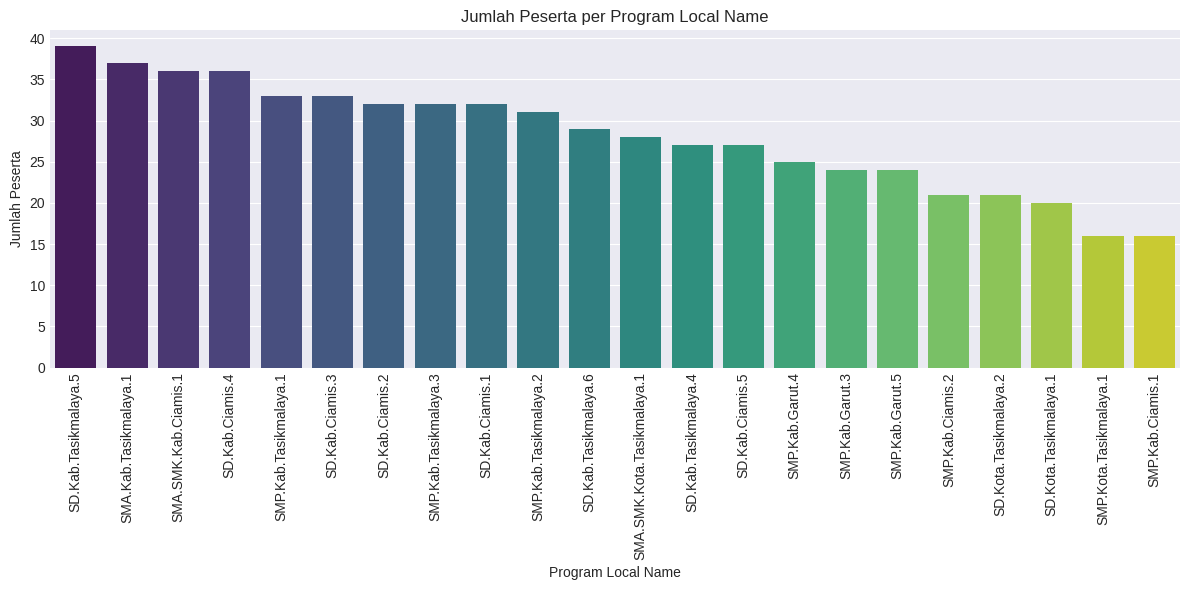

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x=participant_counts.index, y=participant_counts.values, palette='viridis')
plt.xlabel('Program Local Name')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta per Program Local Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Jumlah Peserta untuk Program Local Name terkait SMA:
Program Local Name
SMA.Kab.Tasikmalaya.1         37
SMA.SMK.Kab.Ciamis.1          36
SMA.SMK.Kota.Tasikmalaya.1    28
Name: count, dtype: int64


/tmp/ipython-input-946441275.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')


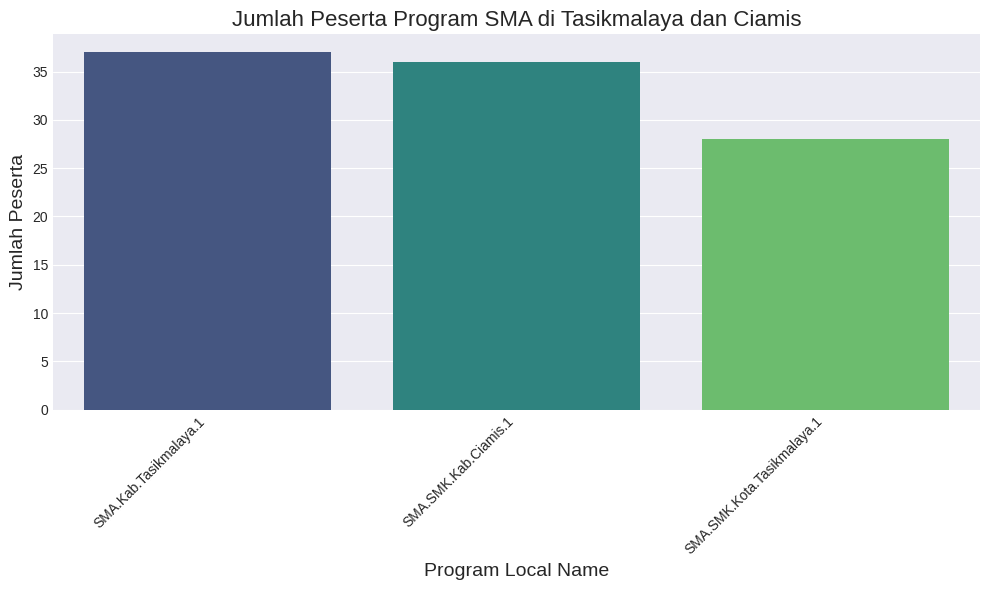

In [34]:
# Melihat Persebaran Peserta di Fase SMA

# Define the keywords to filter
keywords = [
    'SMA.Kab.Tasikmalaya.1',
    'SMA.SMK.Kab.Ciamis.1',
    'SMA.SMK.Kota.Tasikmalaya.1'
]

# Filter the participant_counts Series based on the keywords
filtered_counts = participant_counts[participant_counts.index.isin(keywords)]

print("Jumlah Peserta untuk Program Local Name terkait SMA:")
print(filtered_counts)

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')
plt.xlabel('Program Local Name', fontsize=14)
plt.ylabel('Jumlah Peserta', fontsize=14)
plt.title('Jumlah Peserta Program SMA di Tasikmalaya dan Ciamis', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

Jumlah Peserta untuk Program Local Name terkait SMP (Digabung berdasarkan Wilayah):
Merged Program Name
SMP.Kab.Tasikmalaya     96
SMP.Kab.Garut           73
SMP.Kab.Ciamis          37
SMP.Kota.Tasikmalaya    16
Name: count, dtype: int64


/tmp/ipython-input-1931476330.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_smp_counts.index, y=merged_smp_counts.values, palette='viridis')


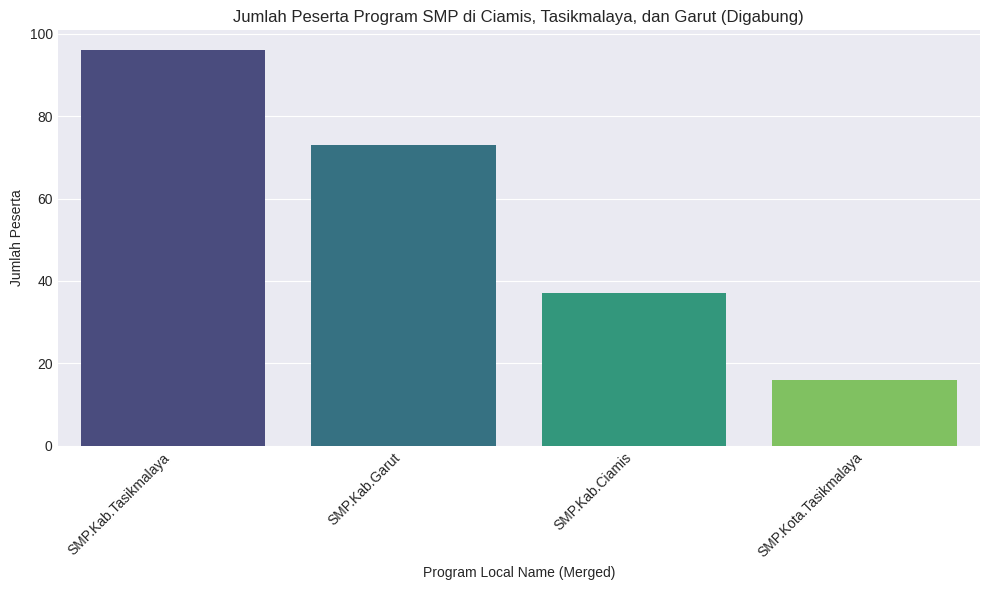

In [35]:
# Melihat Persebaran Peserta di Fase SMP
smp_categories = {
    'SMP.Kab.Ciamis': ['SMP.Kab.Ciamis.1', 'SMP.Kab.Ciamis.2'],
    'SMP.Kab.Tasikmalaya': ['SMP.Kab.Tasikmalaya.1', 'SMP.Kab.Tasikmalaya.2', 'SMP.Kab.Tasikmalaya.3'],
    'SMP.Kota.Tasikmalaya': ['SMP.Kota.Tasikmalaya.1'],
    'SMP.Kab.Garut': ['SMP.Kab.Garut.3', 'SMP.Kab.Garut.4', 'SMP.Kab.Garut.5']
}

# Create a mapping from specific program names to merged categories
merged_category_map = {item: key for key, values in smp_categories.items() for item in values}

# Filter df_kelulusan for relevant SMP programs
filtered_df_smp = df_kelulusan[df_kelulusan['Program Local Name'].isin(list(merged_category_map.keys()))].copy()

# Create a new column with the merged program names
filtered_df_smp['Merged Program Name'] = filtered_df_smp['Program Local Name'].map(merged_category_map)

# Calculate participant counts for the merged categories
merged_smp_counts = filtered_df_smp['Merged Program Name'].value_counts()

print("Jumlah Peserta untuk Program Local Name terkait SMP (Digabung berdasarkan Wilayah):")
print(merged_smp_counts)

# Create the visualization for merged SMP programs
plt.figure(figsize=(10, 6))
sns.barplot(x=merged_smp_counts.index, y=merged_smp_counts.values, palette='viridis')
plt.xlabel('Program Local Name (Merged)')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Program SMP di Ciamis, Tasikmalaya, dan Garut (Digabung)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

Jumlah Peserta untuk Program Local Name terkait SD (Digabung berdasarkan Wilayah):
Merged Program Name
SD.Kab.Ciamis          160
SD.Kab.Tasikmalaya      95
SD.Kota.Tasikmalaya     41
Name: count, dtype: int64


/tmp/ipython-input-4223586123.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_sd_counts.index, y=merged_sd_counts.values, palette='viridis')


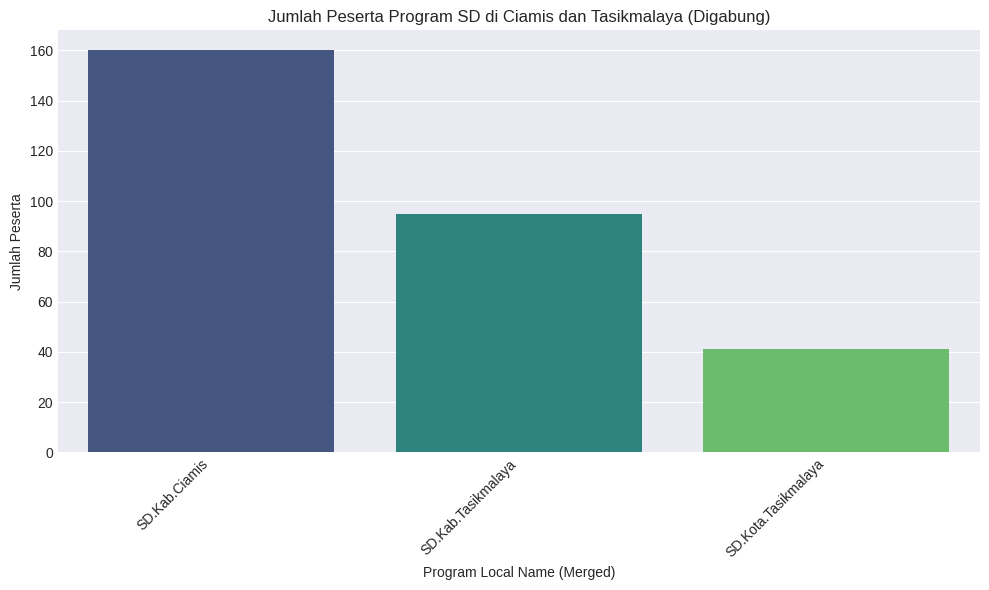

In [36]:
# Melihat Persebaran Peserta di Fase SD
sd_categories = {
    'SD.Kab.Ciamis': ['SD.Kab.Ciamis.1', 'SD.Kab.Ciamis.2', 'SD.Kab.Ciamis.3', 'SD.Kab.Ciamis.4', 'SD.Kab.Ciamis.5'],
    'SD.Kab.Tasikmalaya': ['SD.Kab.Tasikmalaya.4', 'SD.Kab.Tasikmalaya.5', 'SD.Kab.Tasikmalaya.6'],
    'SD.Kota.Tasikmalaya': ['SD.Kota.Tasikmalaya.1', 'SD.Kota.Tasikmalaya.2']
    # Assuming no SD.Kab.Garut based on previous outputs, but including if it appears later
    # 'SD.Kab.Garut': []
}

# Create a mapping from specific program names to merged categories
merged_category_map_sd = {item: key for key, values in sd_categories.items() for item in values}

# Filter df_kelulusan for relevant SD programs
filtered_df_sd = df_kelulusan[df_kelulusan['Program Local Name'].isin(list(merged_category_map_sd.keys()))].copy()

# Create a new column with the merged program names
filtered_df_sd['Merged Program Name'] = filtered_df_sd['Program Local Name'].map(merged_category_map_sd)

# Calculate participant counts for the merged categories
merged_sd_counts = filtered_df_sd['Merged Program Name'].value_counts()

print("Jumlah Peserta untuk Program Local Name terkait SD (Digabung berdasarkan Wilayah):")
print(merged_sd_counts)

# Create the visualization for merged SD programs
plt.figure(figsize=(10, 6))
sns.barplot(x=merged_sd_counts.index, y=merged_sd_counts.values, palette='viridis')
plt.xlabel('Program Local Name (Merged)')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Program SD di Ciamis dan Tasikmalaya (Digabung)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

**Melihat Data Perbandingan Kelulusan**

In [37]:
# Mensegmentasikan Data Kelulusan Berdasarkan Jenjang

def get_fase_pendidikan(program_name):
    if 'SMA' in program_name:
        return 'SMA'
    elif 'SMP' in program_name:
        return 'SMP'
    elif 'SD' in program_name:
        return 'SD'
    return 'Other' # Default or unknown category

df_kelulusan['Fase Pendidikan'] = df_kelulusan['Program Local Name'].apply(get_fase_pendidikan)

print("df_kelulusan with new 'Fase Pendidikan' column:")
display(df_kelulusan.head())

df_kelulusan with new 'Fase Pendidikan' column:


,User ID,Nama,Program Local Name,Canvas Score,Total Score,Predikat,Status Kelulusan,Fase Pendidikan
0,V0Bj21oo0Z,AAN NURAENI,SD.Kab.Ciamis.3,87.16,87.16,Baik,Lulus,SD
1,qo68WAmb0a,ABDUL ROSID,SD.Kab.Ciamis.3,85.94,85.94,Baik,Lulus,SD
2,J61gO4KE97,ADI MUHAROM NUR,SD.Kab.Ciamis.3,86.05,86.06,Baik,Lulus,SD
3,OyDOd1Kw9X,ADI TARDINDA,SD.Kab.Ciamis.3,85.84,85.85,Baik,Lulus,SD
4,50ZOQBMN6m,AGUS JAJAT JATMIHA,SD.Kab.Ciamis.3,84.27,84.28,Baik,Lulus,SD


In [38]:
# Menghitung Angka Kelulusan

performance_by_phase = df_kelulusan.groupby(['Fase Pendidikan', 'Status Kelulusan']).size().unstack(fill_value=0)

print("Performance by Educational Phase and Status:\n")
display(performance_by_phase)


Performance by Educational Phase and Status:



Status Kelulusan,Lulus,Tidak Lulus
Fase Pendidikan,,
SD,293,3
SMA,93,8
SMP,203,19


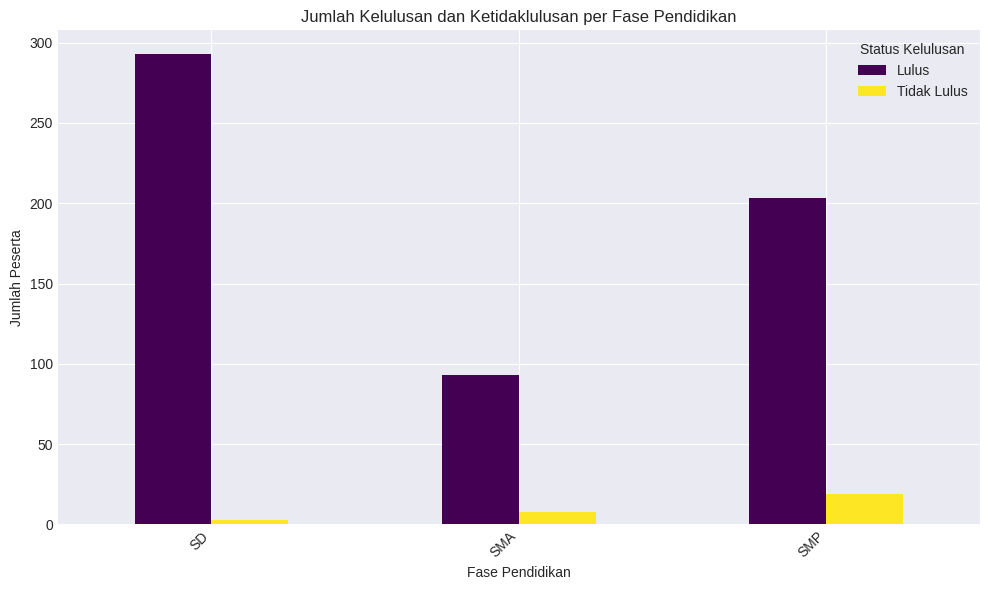

In [39]:
#Melakukan Visualisasi Terhadap data yang Lulus dan Tidak Lulus

performance_by_phase.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Jumlah Kelulusan dan Ketidaklulusan per Fase Pendidikan')
plt.xlabel('Fase Pendidikan')
plt.ylabel('Jumlah Peserta')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status Kelulusan')
plt.tight_layout()
plt.show()


# **Task 1 (Data Aggregate)**
**(Membuat DataFrame Anggota Tim dengan Lokus dan Kelulusan Peserta)**

In [40]:
total_participants_per_lokus = df_kelulusan['Program Local Name'].value_counts().rename('Total Participants')

passing_participants = df_kelulusan[df_kelulusan['Status Kelulusan'] == 'Lulus']
passing_participants_per_lokus = passing_participants['Program Local Name'].value_counts().rename('Passing Participants')

lokus_performance = pd.DataFrame({
    'Total Participants': total_participants_per_lokus,
    'Passing Participants': passing_participants_per_lokus
}).fillna(0).astype(int)

print("Lokus Performance Summary:")
display(lokus_performance.head())
print(f"\nTotal entries in lokus_performance: {len(lokus_performance)}")

Lokus Performance Summary:


,Total Participants,Passing Participants
Program Local Name,,
SD.Kab.Ciamis.1,32,32
SD.Kab.Ciamis.2,32,32
SD.Kab.Ciamis.3,33,32
SD.Kab.Ciamis.4,36,36
SD.Kab.Ciamis.5,27,27



Total entries in lokus_performance: 22


In [41]:
# menggabungkan data anggota tim dengan jumlah peserta

df_merged_performance = pd.merge(df_table_member,
                                 lokus_performance,
                                 left_on='Lokus',
                                 right_index=True,
                                 how='left')

print("Merged DataFrame (df_merged_performance) head:")
display(df_merged_performance.head())

Merged DataFrame (df_merged_performance) head:


,No,Batch,Lokus,Anggota 1,Anggota 2,Anggota 3,Anggota 4,Anggota 5,Total Participants,Passing Participants
0,1,1.10,SD.Kab.Ciamis.3,"Ir. Heni Sulastri, S.T., M.T","Neng Ika Kurniati, S.Si., M.Cs.",Muhamad Kaila Putra Julianto,Muhammad Alif Akhdan Tsani,Muhammad Azfa Huwaiza Al Aflah,33,32
1,2,1.20,SD.Kab.Ciamis.4,"Ratna Rustina, M.Pd","Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",Shofi Nurul Aini,Christine Angelica Soeharyanto,Farhan Esha Putra Kusuma Atmaja,36,36
2,3,1.30,SD.Kab.Ciamis.5,"Agus Supriatman, S.T., M.Kom.","Hilman Mutaqin, S.T., M.Kom.","Dimas Adisa Suryatama, S.Pd",Lauren Nugraha,Novarianda saputra,27,27
3,4,1.40,SMA.SMK.Kab.Ciamis.1,"Dr. Ir. R. Reza El Akbar., S.Si., M.T., M.Kom","Agus Maulani, S.Sn","Reva Arya Maulana, RHCSA, CND, ECIH.","Rizki Pratama, CND., ECIH",Ali Astra Mikail,36,34
4,5,1.50,SMP.Kab.Ciamis.1,"Dr. Ir. Eka Wahyu Hidayat, ST., MT., MCE","Robby Maududy, S.Pd., M. Kom",Muhamad Aditya Darmawan,Farhan Sabani,Muhamad Ali Murtadho,16,16


In [42]:
# Melakukan agregasi terhadap data member dan kelulusann

df_melted = df_merged_performance.melt(id_vars=['No', 'Batch', 'Lokus', 'Total Participants', 'Passing Participants'],
                                   value_vars=[col for col in df_merged_performance.columns if 'Anggota' in col],
                                   var_name='Anggota Type',
                                   value_name='Nama Fasilitator')

# Drop rows where 'Nama Fasilitator' might be empty or NaN if a lokus had fewer than 5 anggota
df_melted = df_melted.dropna(subset=['Nama Fasilitator'])

# Aggregate by 'Nama Fasilitator'
df_member = df_melted.groupby('Nama Fasilitator').agg(
    Jumlah_Lokus_Pegangan=('Lokus', 'nunique'),
    Total_Peserta_Responsibility=('Total Participants', 'sum'),
    Lulus_Peserta_Responsibility=('Passing Participants', 'sum')
).reset_index()

print("Aggregated df_member head:")
display(df_member.head())

Aggregated df_member head:


,Nama Fasilitator,Jumlah_Lokus_Pegangan,Total_Peserta_Responsibility,Lulus_Peserta_Responsibility
0,"Adhi Arsandi, S.I.Kom., M.T.",1,28,25
1,"Agus Maulani, S.Sn",1,36,34
2,"Agus Supriatman, S.T., M.Kom.",4,102,99
3,Ali Astra Mikail,3,101,93
4,Anzar Rahman Permana,3,80,78


In [43]:
# Melihat Anggota Tim dengan Jumlah Lokus dan Peserta Pegangan

df_member['Persentase Kelulusan Peserta'] = (df_member['Lulus_Peserta_Responsibility'] / df_member['Total_Peserta_Responsibility'] * 100).round(2)
df_member['Persentase Kelulusan Peserta'] = df_member['Persentase Kelulusan Peserta'].replace([np.inf, -np.inf], 0)
df_member['Peserta Yang Lulus'] = df_member['Lulus_Peserta_Responsibility'].astype(str) + '/' + df_member['Total_Peserta_Responsibility'].astype(str)

print("Final df_member head with 'Peserta Yang Lulus' and 'Persentase Kelulusan Peserta':")
display(df_member)

Final df_member head with 'Peserta Yang Lulus' and 'Persentase Kelulusan Peserta':


,Nama Fasilitator,Jumlah_Lokus_Pegangan,Total_Peserta_Responsibility,Lulus_Peserta_Responsibility,Persentase Kelulusan Peserta,Peserta Yang Lulus
0,"Adhi Arsandi, S.I.Kom., M.T.",1,28,25,89.29,25/28
1,"Agus Maulani, S.Sn",1,36,34,94.44,34/36
2,"Agus Supriatman, S.T., M.Kom.",4,102,99,97.06,99/102
3,Ali Astra Mikail,3,101,93,92.08,93/101
4,Anzar Rahman Permana,3,80,78,97.50,78/80
5,Christine Angelica Soeharyanto,3,96,95,98.96,95/96
6,"Dimas Adisa Suryatama, S.Pd",4,112,108,96.43,108/112
7,Dina lestari,3,70,62,88.57,62/70
8,"Dr. Ir. Eka Wahyu Hidayat, ST., MT., MCE",4,100,95,95.00,95/100
9,"Dr. Ir. R. Reza El Akbar., S.Si., M.T., M.Kom",4,125,114,91.20,114/125


In [44]:
df_member = df_member[df_member['Nama Fasilitator'] != 'Null']
df_member = df_member.dropna()
df_member = df_member.sort_values(by='Jumlah_Lokus_Pegangan', ascending=False).reset_index(drop=True)
display(df_member)

,Nama Fasilitator,Jumlah_Lokus_Pegangan,Total_Peserta_Responsibility,Lulus_Peserta_Responsibility,Persentase Kelulusan Peserta,Peserta Yang Lulus
0,"Agus Supriatman, S.T., M.Kom.",4,102,99,97.06,99/102
1,"Dimas Adisa Suryatama, S.Pd",4,112,108,96.43,108/112
2,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",4,116,109,93.97,109/116
3,"Ir. Heni Sulastri, S.T., M.T",4,118,113,95.76,113/118
4,"Hilman Mutaqin, S.T., M.Kom.",4,103,99,96.12,99/103
5,Farhan Esha Putra Kusuma Atmaja,4,117,110,94.02,110/117
6,"Dr. Ir. R. Reza El Akbar., S.Si., M.T., M.Kom",4,125,114,91.20,114/125
7,"Dr. Ir. Eka Wahyu Hidayat, ST., MT., MCE",4,100,95,95.00,95/100
8,"Rizki Pratama, CND., ECIH",4,125,114,91.20,114/125
9,"Reva Arya Maulana, RHCSA, CND, ECIH.",4,126,114,90.48,114/126


In [45]:
#Simpan df_member
output_dir = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kinerja tim proyek/output'
output_path = os.path.join(output_dir, 'df_member_export.csv')

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

df_member.to_csv(output_path, index=False)
print(f"df_member successfully exported to {output_path}")

df_member successfully exported to /content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kinerja tim proyek/output/df_member_export.csv


# **Task 2 (AI Comparison)**

## Merge Data

In [46]:
# Merge AI evaluations with HR ground truth
df_merged = df_ai_all_cleaned.merge(df_hr[['ID', 'Nilai_HR']], on='ID', how='inner')

# Calculate error metrics
df_merged['Error'] = df_merged['Nilai_AI'] - df_merged['Nilai_HR']
df_merged['Absolute_Error'] = abs(df_merged['Error'])
df_merged['Squared_Error'] = df_merged['Error'] ** 2
df_merged['Percentage_Error'] = (df_merged['Absolute_Error'] / df_merged['Nilai_HR']) * 100

print(f"Merged Data Shape: {df_merged.shape}")
print(f"\nPlatforms in merged data: {df_merged['Platform'].value_counts()}")
print(f"\nSample merged data:")
display(df_merged.head())

Merged Data Shape: (160, 10)

Platforms in merged data: Platform
ChatGPT.5.2          32
Claude Sonnet 4.5    32
Deep Seek V3.2       32
Gemini 3 pro         32
GLM 4.7              32
Name: count, dtype: int64

Sample merged data:


,ID,Nama,Nilai_AI,Platform,Waktu,Nilai_HR,Error,Absolute_Error,Squared_Error,Percentage_Error
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,ChatGPT.5.2,00:04.13,90,5.00,5.00,25.00,5.56
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,ChatGPT.5.2,00:02.03,92,0.00,0.00,0.00,0.00
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",96.00,ChatGPT.5.2,00:04.19,90,6.00,6.00,36.00,6.67
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,ChatGPT.5.2,00:03.20,88,3.00,3.00,9.00,3.41
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",95.00,ChatGPT.5.2,00:03.54,88,7.00,7.00,49.00,7.95


## Menampilkan Nilai HR dan AI



In [47]:
# 1. Prepare HR data
df_hr_scores = df_hr[['ID', 'Nama', 'Nilai_HR']].copy()

In [48]:
# 2. Pivot AI data to get individual platform scores as columns
# Ensure 'Nama' is included in the pivot to join correctly with df_hr_scores
df_ai_pivot = df_ai_all_cleaned.pivot_table(index=['ID', 'Nama'], columns='Platform', values='Nilai_AI').reset_index()

# 3. Merge HR scores with pivoted AI scores
df_nilai_combined = pd.merge(df_hr_scores, df_ai_pivot, on=['ID', 'Nama'], how='left')

In [49]:
# 5. Reorder columns to match the requested sequence
requested_columns = [
    'ID', 'Nama', 'Nilai_HR',
    'ChatGPT.5.2', 'Claude Sonnet 4.5', 'Gemini 3 pro', 'GLM 4.7', 'Deep Seek V3.2'
]
# Filter out columns that might not exist after merges (e.g., if a platform was missing)
df_nilai_combined = df_nilai_combined[[col for col in requested_columns if col in df_nilai_combined.columns]]

print("Combined performance table (df_nilai_combined):")
display(df_nilai_combined.head())


Combined performance table (df_nilai_combined):


,ID,Nama,Nilai_HR,ChatGPT.5.2,Claude Sonnet 4.5,Gemini 3 pro,GLM 4.7,Deep Seek V3.2
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",90,95.00,88.00,97.00,97.00,91.00
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92,92.00,92.00,98.00,98.00,95.00
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",90,96.00,90.00,98.00,98.00,94.00
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",88,91.00,94.00,96.00,96.00,97.00
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",88,95.00,93.00,98.00,98.00,95.00


In [50]:
# 6. Export to Excel
output_dir = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kinerja tim proyek/output'
output_filename = 'combined_facilitator_scores.xlsx'
output_path = os.path.join(output_dir, output_filename)

os.makedirs(output_dir, exist_ok=True)

df_nilai_combined.to_excel(output_path, index=False)
print(f"\nCombined facilitator scores successfully exported to {output_path}")


Combined facilitator scores successfully exported to /content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kinerja tim proyek/output/combined_facilitator_scores.xlsx


## Matriks Akurasi

In [51]:
# Calculate metrics for each platform
results = []

for platform in df_merged['Platform'].unique():

    # Filter data for this platform
    df_platform = df_merged[df_merged['Platform'] == platform]

    # Extract values
    y_true = df_platform['Nilai_HR'].values
    y_pred = df_platform['Nilai_AI'].values

    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Pearson correlation
    pearson_r, pearson_p = pearsonr(y_true, y_pred)

    # Spearman correlation
    spearman_rho, spearman_p = spearmanr(y_true, y_pred)

    # MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Systematic bias
    bias = np.mean(y_pred - y_true)

    # Store results
    results.append({
        'Platform': platform,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Pearson_r': pearson_r,
        'Pearson_p': pearson_p,
        'Spearman_ρ': spearman_rho,
        'Spearman_p': spearman_p,
        'MAPE_%': mape,
        'Bias': bias,
        'N': len(df_platform)
    })

# Create results dataframe
df_results = pd.DataFrame(results)

In [52]:
# Sort by MAE (lower is better)
df_results = df_results.sort_values('MAE')
df_results['Rank'] = range(1, len(df_results) + 1)

# Reorder columns
df_results = df_results[['Rank', 'Platform', 'MAE', 'RMSE', 'R²', 'Pearson_r',
                         'Pearson_p', 'Spearman_ρ', 'Spearman_p', 'MAPE_%', 'Bias', 'N']]

print("\n" + "="*80)
print("ACCURACY METRICS BY PLATFORM")
print("="*80)
display(df_results)



ACCURACY METRICS BY PLATFORM


,Rank,Platform,MAE,RMSE,R²,Pearson_r,Pearson_p,Spearman_ρ,Spearman_p,MAPE_%,Bias,N
0,1,ChatGPT.5.2,3.03,3.81,-2.82,0.07,0.70,0.12,0.51,3.43,2.72,32
1,2,Claude Sonnet 4.5,4.50,5.39,-6.63,-0.41,0.02,-0.41,0.02,5.08,3.12,32
2,3,Deep Seek V3.2,5.12,5.78,-7.76,-0.19,0.30,-0.14,0.43,5.78,4.88,32
3,4,Gemini 3 pro,6.53,7.05,-12.05,0.00,0.99,0.04,0.83,7.35,6.47,32
4,5,GLM 4.7,7.50,7.87,-15.28,-0.09,0.61,-0.10,0.59,8.44,7.50,32


##Interpretasi Perankingan

In [54]:
print(f"Jumlah anggota unik di df_member: {df_member['Nama Fasilitator'].nunique()}")
print(f"Jumlah anggota unik di df_hr: {df_hr['Nama'].nunique()}")
print(f"Jumlah anggota unik di df_ai_all_cleaned: {df_ai_all_cleaned['Nama'].nunique()}")

# Let's check the shape after the first merge
df_facilitator_hr_temp = df_hr[['Nama', 'Nilai_HR']].rename(columns={'Nama': 'Nama Fasilitator'})
df_merged_step1 = pd.merge(df_member, df_facilitator_hr_temp, on='Nama Fasilitator', how='LEFT')
print(f"Jumlah anggota setelah merge df_member dan df_hr: {df_merged_step1['Nama Fasilitator'].nunique()}")

# Let's check the shape after the second merge (with AI data)
df_facilitator_ai_scores_temp = df_ai_all_cleaned[['Nama', 'Platform', 'Nilai_AI']].rename(columns={'Nama': 'Nama Fasilitator'})
df_facilitator_ai_pivot_temp = df_facilitator_ai_scores_temp.groupby(['Nama Fasilitator', 'Platform'])['Nilai_AI'].mean().unstack(fill_value=np.nan)
df_facilitator_ai_pivot_temp = df_facilitator_ai_pivot_temp.add_prefix('Nilai_AI_')

df_merged_step2 = pd.merge(df_merged_step1, df_facilitator_ai_pivot_temp, on='Nama Fasilitator', how='LEFT')
print(f"Jumlah anggota setelah merge dengan df_facilitator_ai_pivot: {df_merged_step2['Nama Fasilitator'].nunique()}")

# Finally, df_correlation_final itself
print(f"Jumlah anggota di df_correlation_final (setelah semua merge dan dropna): {df_correlation_final['Nama Fasilitator'].nunique()}")

print("Ini menunjukkan bahwa ada anggota yang mungkin tidak memiliki data di semua sumber (HR, AI), sehingga mereka tidak termasuk dalam analisis korelasi ini.")

Jumlah anggota unik di df_member: 32
Jumlah anggota unik di df_hr: 32
Jumlah anggota unik di df_ai_all_cleaned: 32


UnboundLocalError: cannot access local variable 'lidx' where it is not associated with a value


Correlation Matrix:


,Nilai_HR,Persentase Kelulusan Peserta,Nilai_AI_ChatGPT.5.2,Nilai_AI_Claude Sonnet 4.5,Nilai_AI_Gemini 3 pro,Nilai_AI_GLM 4.7,Nilai_AI_Deep Seek V3.2
Nilai_HR,1.00,-0.40,0.15,-0.20,0.26,0.08,-0.03
Persentase Kelulusan Peserta,-0.40,1.00,-0.03,0.71,-0.03,-0.03,0.34
Nilai_AI_ChatGPT.5.2,0.15,-0.03,1.00,-0.03,0.52,0.63,0.59
Nilai_AI_Claude Sonnet 4.5,-0.20,0.71,-0.03,1.00,0.37,0.31,0.61
Nilai_AI_Gemini 3 pro,0.26,-0.03,0.52,0.37,1.00,0.84,0.61
Nilai_AI_GLM 4.7,0.08,-0.03,0.63,0.31,0.84,1.00,0.67
Nilai_AI_Deep Seek V3.2,-0.03,0.34,0.59,0.61,0.61,0.67,1.00


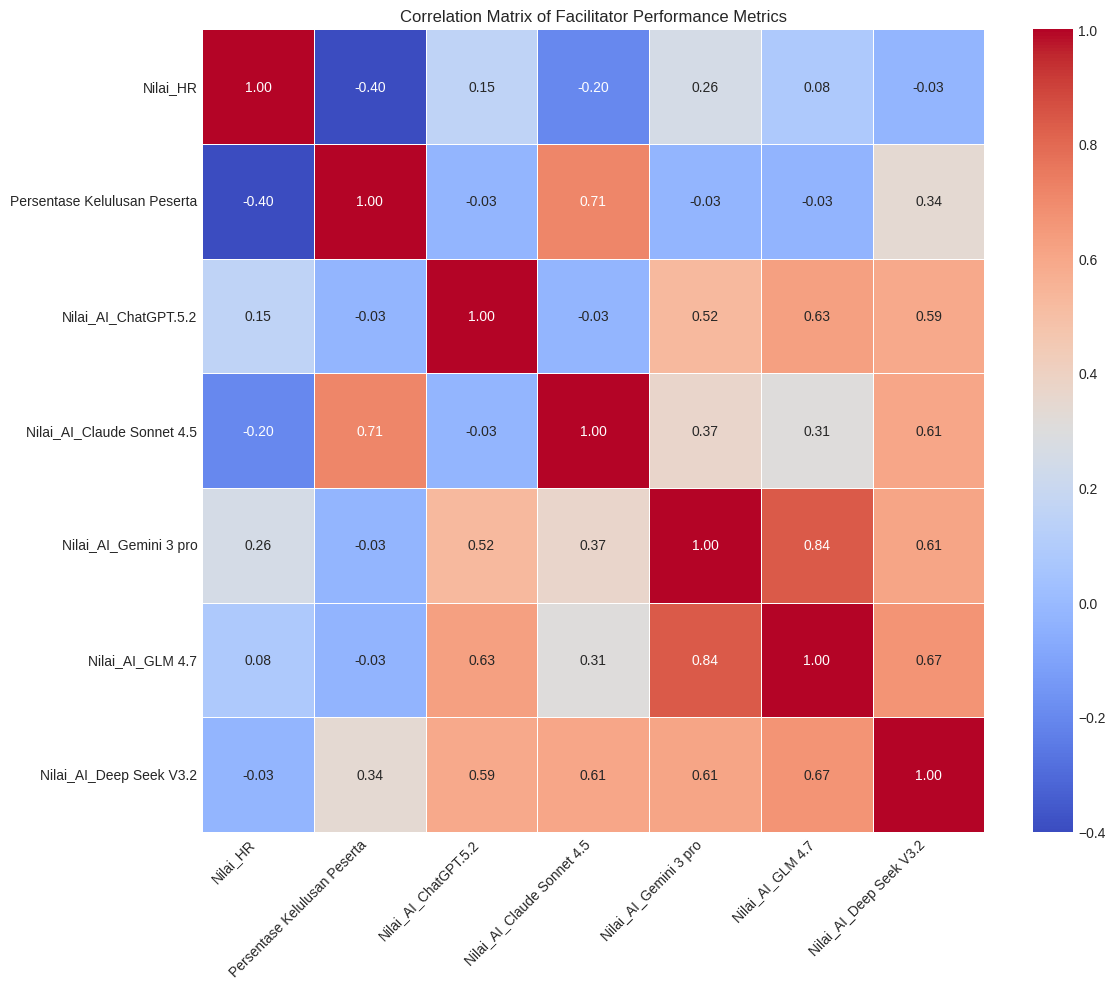

In [55]:
# 1. Prepare df_facilitator_hr
df_facilitator_hr = df_hr[['Nama', 'Nilai_HR']].rename(columns={'Nama': 'Nama Fasilitator'})

# 2. Prepare AI scores
ai_platform_cols_original = [
    'ChatGPT.5.2', 'Claude Sonnet 4.5', 'Gemini 3 pro', 'GLM 4.7', 'Deep Seek V3.2'
]

ai_platform_cols_existing = [col for col in ai_platform_cols_original if col in df_nilai_combined.columns]

df_ai_scores_for_merge = df_nilai_combined[['Nama'] + ai_platform_cols_existing].copy()
df_ai_scores_for_merge = df_ai_scores_for_merge.rename(columns={'Nama': 'Nama Fasilitator'})

rename_ai_cols = {col: f'Nilai_AI_{col}' for col in ai_platform_cols_existing}
df_ai_scores_for_merge = df_ai_scores_for_merge.rename(columns=rename_ai_cols)

# 3. Merge dengan LEFT JOIN (mempertahankan semua data dari df_member)
df_correlation_base = pd.merge(df_member,
                               df_facilitator_hr,
                               on='Nama Fasilitator',
                               how='left')  # ← PERBAIKAN: GUNAKAN LEFT

# 4. Merge dengan AI scores (LEFT JOIN)
df_correlation_final = pd.merge(df_correlation_base,
                                df_ai_scores_for_merge,
                                on='Nama Fasilitator',
                                how='left')  # ← PERBAIKAN: GUNAKAN LEFT

# 5. Prepare kolom untuk korelasi
correlation_cols_to_use = [
    'Nilai_HR',
    'Persentase Kelulusan Peserta'
] + [
    col for col in df_correlation_final.columns if col.startswith('Nilai_AI_')
]

# Convert to numeric
for col in correlation_cols_to_use:
    df_correlation_final[col] = pd.to_numeric(df_correlation_final[col], errors='coerce')

# 7. Calculate correlation
correlation_matrix = df_correlation_final[correlation_cols_to_use].corr()

print("\nCorrelation Matrix:")
display(correlation_matrix)

# 8. Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Facilitator Performance Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
ranking_columns = [
    'Nilai_HR',
    'Nilai_AI_ChatGPT.5.2',
    'Nilai_AI_Claude Sonnet 4.5',
    'Nilai_AI_Deep Seek V3.2',
    'Nilai_AI_GLM 4.7',
    'Nilai_AI_Gemini 3 pro'
]

# Get ID from df_hr, which contains 'ID' and 'Nama'
df_facilitator_ids = df_hr[['ID', 'Nama']].rename(columns={'Nama': 'Nama Fasilitator'})

print("\n--- Peringkat Anggota Tim berdasarkan Nilai Kinerja ---")
print("="*70)

for col in ranking_columns:
    # Sort the DataFrame by the current score column
    df_ranked = df_correlation_final.sort_values(by=col, ascending=False).reset_index(drop=True)

    # Merge with facilitator IDs
    df_ranked = pd.merge(df_ranked, df_facilitator_ids, on='Nama Fasilitator', how='left')

    print(f"\n🏆 Peringkat berdasarkan: {col.replace('Nilai_AI_', 'Nilai AI ')}")
    print("-"*50)

    # Display top 3
    print("Top 3:")
    display(df_ranked[['ID', 'Nama Fasilitator', col]].head(3))

    # Display bottom 3, if there are more than 3 unique entries
    if len(df_ranked) > 3:
        print("\nBottom 3:")
        display(df_ranked[['ID', 'Nama Fasilitator', col]].tail(3))

print("="*70)


--- Peringkat Anggota Tim berdasarkan Nilai Kinerja ---

🏆 Peringkat berdasarkan: Nilai_HR
--------------------------------------------------
Top 3:


,ID,Nama Fasilitator,Nilai_HR
0,FKKA-29,"Rizki Pratama, CND., ECIH",92.00
1,FKKA-08,"Neng Ika Kurniati, S.Si., M.Cs.",92.00
2,FKKA-14,"Tatang Kurniawan., S.T., M.Pd.",92.00



Bottom 3:


,ID,Nama Fasilitator,Nilai_HR
29,NaN,Novarianda saputra,NaN
30,NaN,Dina lestari,NaN
31,NaN,Shofi Nurul Aini,NaN



🏆 Peringkat berdasarkan: Nilai AI ChatGPT.5.2
--------------------------------------------------
Top 3:


,ID,Nama Fasilitator,Nilai_AI_ChatGPT.5.2
0,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",96.00
1,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",95.00
2,FKKA-23,Muhamad Ali Murtadho,95.00



Bottom 3:


,ID,Nama Fasilitator,Nilai_AI_ChatGPT.5.2
29,NaN,Novarianda saputra,NaN
30,NaN,Dina lestari,NaN
31,NaN,Shofi Nurul Aini,NaN



🏆 Peringkat berdasarkan: Nilai AI Claude Sonnet 4.5
--------------------------------------------------
Top 3:


,ID,Nama Fasilitator,Nilai_AI_Claude Sonnet 4.5
0,FKKA-32,Nadhif Zuhayri Abdillah,98.00
1,FKKA-23,Muhamad Ali Murtadho,98.00
2,FKKA-15,Muhamad Kaila Putra Julianto,96.00



Bottom 3:


,ID,Nama Fasilitator,Nilai_AI_Claude Sonnet 4.5
29,NaN,Novarianda saputra,NaN
30,NaN,Dina lestari,NaN
31,NaN,Shofi Nurul Aini,NaN



🏆 Peringkat berdasarkan: Nilai AI Deep Seek V3.2
--------------------------------------------------
Top 3:


,ID,Nama Fasilitator,Nilai_AI_Deep Seek V3.2
0,FKKA-23,Muhamad Ali Murtadho,98.00
1,FKKA-15,Muhamad Kaila Putra Julianto,98.00
2,FKKA-04,"Agus Supriatman, S.T., M.Kom.",97.00



Bottom 3:


,ID,Nama Fasilitator,Nilai_AI_Deep Seek V3.2
29,NaN,Novarianda saputra,NaN
30,NaN,Dina lestari,NaN
31,NaN,Shofi Nurul Aini,NaN



🏆 Peringkat berdasarkan: Nilai AI GLM 4.7
--------------------------------------------------
Top 3:


,ID,Nama Fasilitator,Nilai_AI_GLM 4.7
0,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",98.00
1,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",98.00
2,FKKA-29,"Rizki Pratama, CND., ECIH",98.00



Bottom 3:


,ID,Nama Fasilitator,Nilai_AI_GLM 4.7
29,NaN,Novarianda saputra,NaN
30,NaN,Dina lestari,NaN
31,NaN,Shofi Nurul Aini,NaN



🏆 Peringkat berdasarkan: Nilai AI Gemini 3 pro
--------------------------------------------------
Top 3:


,ID,Nama Fasilitator,Nilai_AI_Gemini 3 pro
0,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",98.00
1,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",98.00
2,FKKA-29,"Rizki Pratama, CND., ECIH",98.00



Bottom 3:


,ID,Nama Fasilitator,Nilai_AI_Gemini 3 pro
29,NaN,Novarianda saputra,NaN
30,NaN,Dina lestari,NaN
31,NaN,Shofi Nurul Aini,NaN


In [ ]:
ranking_columns = [
    'Nilai_HR',
    'Nilai_AI_ChatGPT.5.2',
    'Nilai_AI_Claude Sonnet 4.5',
    'Nilai_AI_Deep Seek V3.2',
    'Nilai_AI_GLM 4.7',
    'Nilai_AI_Gemini 3 pro'
]

df_facilitator_ids = df_hr[['ID', 'Nama']].rename(columns={'Nama': 'Nama Fasilitator'})

platform_labels = {
    'Nilai_HR': 'HR',
    'Nilai_AI_ChatGPT.5.2': 'ChatGPT 5.2',
    'Nilai_AI_Claude Sonnet 4.5': 'Claude Sonnet 4.5',
    'Nilai_AI_Deep Seek V3.2': 'Deep Seek V3.2',
    'Nilai_AI_GLM 4.7': 'GLM 4.7',
    'Nilai_AI_Gemini 3 pro': 'Gemini 3 Pro'
}

print("="*120)
print("Tabel 1. Perbandingan Top 3 Anggota Tim Berdasarkan Seluruh Platform")
print("="*120)

# Build comparison table for Top 3
comparison_top3 = {'Rank': [1, 2, 3]}

for col in ranking_columns:
    df_ranked = df_correlation_final.sort_values(by=col, ascending=False).reset_index(drop=True)
    df_ranked = pd.merge(df_ranked, df_facilitator_ids, on='Nama Fasilitator', how='left')

    platform = platform_labels[col]

    # Get top 3: ID (Nilai)
    top3_data = []
    for i in range(min(3, len(df_ranked))):
        id_val = df_ranked.iloc[i]['ID']
        nilai = df_ranked.iloc[i][col]
        top3_data.append(f"{id_val} ({nilai})")

    comparison_top3[platform] = top3_data

df_comparison_top3 = pd.DataFrame(comparison_top3)
display(df_comparison_top3)

print("\n" + "="*120)
print("Tabel 2. Perbandingan Bottom 3 Anggota Tim Berdasarkan Seluruh Platform")
print("="*120)

# Build comparison table for Bottom 3
n_total = len(df_correlation_final)
comparison_bottom3 = {'Rank': [n_total-2, n_total-1, n_total]}

for col in ranking_columns:
    df_ranked = df_correlation_final.sort_values(by=col, ascending=False).reset_index(drop=True)
    df_ranked = pd.merge(df_ranked, df_facilitator_ids, on='Nama Fasilitator', how='left')

    platform = platform_labels[col]
    n = len(df_ranked)

    # Get bottom 3: ID (Nilai)
    bottom3_data = []
    for i in range(min(3, len(df_ranked))):
        idx = n - 3 + i
        id_val = df_ranked.iloc[idx]['ID']
        nilai = df_ranked.iloc[idx][col]
        bottom3_data.append(f"{id_val} ({nilai})")

    comparison_bottom3[platform] = bottom3_data

df_comparison_bottom3 = pd.DataFrame(comparison_bottom3)
display(df_comparison_bottom3)

print("\n" + "="*120)

In [ ]:
ranking_columns = [
    'Nilai_HR',
    'Nilai_AI_ChatGPT.5.2',
    'Nilai_AI_Claude Sonnet 4.5',
    'Nilai_AI_Deep Seek V3.2',
    'Nilai_AI_GLM 4.7',
    'Nilai_AI_Gemini 3 pro'
]

top_n_for_count = 3 # Define what 'top rank' means for counting (e.g., top 3)

top_rank_mentions = {}

# Count how many times each facilitator appears in the top N of any individual ranking
for col in ranking_columns:
    # Get top N facilitators for this metric
    # Ensure we use df_correlation_final as it has all relevant data
    top_facilitators = df_correlation_final.sort_values(by=col, ascending=False)['Nama Fasilitator'].head(top_n_for_count).tolist()
    for name in top_facilitators:
        top_rank_mentions[name] = top_rank_mentions.get(name, 0) + 1

# Convert the results to a DataFrame and sort by count
df_overall_ranking_by_mentions = pd.DataFrame(list(top_rank_mentions.items()), columns=['Nama Fasilitator', f'Jumlah Kemunculan di Top {top_n_for_count} Peringkat'])
df_overall_ranking_by_mentions = df_overall_ranking_by_mentions.sort_values(by=f'Jumlah Kemunculan di Top {top_n_for_count} Peringkat', ascending=False).reset_index(drop=True)

# --- Add ID column to the ranking table ---
# Get ID from df_hr, which contains 'ID' and 'Nama'
df_facilitator_ids = df_hr[['ID', 'Nama']].rename(columns={'Nama': 'Nama Fasilitator'})

# Merge the ranking DataFrame with facilitator IDs
df_overall_ranking_by_mentions = pd.merge(
    df_overall_ranking_by_mentions,
    df_facilitator_ids,
    on='Nama Fasilitator',
    how='left' # Use left merge to keep all facilitators in the ranking table
)

# Reorder columns to place ID at the beginning
df_overall_ranking_by_mentions = df_overall_ranking_by_mentions[['ID', 'Nama Fasilitator', f'Jumlah Kemunculan di Top {top_n_for_count} Peringkat']]
# ----------------------------------------

print(f"\n--- Peringkat Umum Anggota Tim (Berdasarkan Jumlah Kemunculan di Top {top_n_for_count} Peringkat Individu) ---")
print("="*80)
print("Top 3 Fasilitator:")
display(df_overall_ranking_by_mentions.head(3))

print("\nBottom 3 Fasilitator:")
display(df_overall_ranking_by_mentions.tail(3))

print("\nInterpretasi:")
print(f"Peringkat ini menunjukkan nama-nama fasilitator yang paling sering muncul dalam {top_n_for_count} besar di antara semua kategori penilaian (HR dan AI). Fasilitator dengan 'Jumlah Kemunculan di Top {top_n_for_count} Peringkat' yang lebih tinggi dianggap memiliki kinerja yang lebih konsisten atau unggul secara keseluruhan.")

In [ ]:
# Get the best platform
best_platform = df_results.iloc[0]

print("🏆 WINNER: " + best_platform['Platform'])
print("="*60)
print(f"MAE: {best_platform['MAE']:.2f} (lower is better)")
print(f"RMSE: {best_platform['RMSE']:.2f}")
print(f"R²: {best_platform['R²']:.3f} (explains {best_platform['R²']*100:.1f}% of variance)")
print(f"Pearson r: {best_platform['Pearson_r']:.3f} (p < {best_platform['Pearson_p']:.4f})")
print(f"Spearman ρ: {best_platform['Spearman_ρ']:.3f} (p < {best_platform['Spearman_p']:.4f})")
print(f"MAPE: {best_platform['MAPE_%']:.2f}%")
print(f"Systematic Bias: {best_platform['Bias']:.2f}")

if best_platform['Bias'] > 1:
    print(f"  → Tends to OVERESTIMATE by {best_platform['Bias']:.2f} points")
elif best_platform['Bias'] < -1:
    print(f"  → Tends to UNDERESTIMATE by {abs(best_platform['Bias']):.2f} points")
else:
    print(f"  → Minimal systematic bias ✓")

print("\n" + "="*60)
print("RANKING SUMMARY:")
print("="*60)
for idx, row in df_results.iterrows():
    if row['Rank'] == 1:
        medal = "🥇"
    elif row['Rank'] == 2:
        medal = "🥈"
    elif row['Rank'] == 3:
        medal = "🥉"
    else:
        medal = f"  {int(row['Rank'])}"

    print(f"{medal} {row['Platform']:<20} MAE={row['MAE']:.2f}, R²={row['R²']:.3f}, r={row['Pearson_r']:.3f}")

## Statistikal

### Kruskal Wallis

In [ ]:
from scipy import stats

# Prepare data for Kruskal-Wallis test
groups = []
for platform in df_merged['Platform'].unique():
    errors = df_merged[df_merged['Platform'] == platform]['Absolute_Error'].values
    groups.append(errors)

# Perform Kruskal-Wallis test
h_stat, p_value = stats.kruskal(*groups)

print("KRUSKAL-WALLIS TEST")
print("="*60)
print(f"H-statistic: {h_stat:.3f}")
print(f"p-value: {p_value:.6f}")
print()

if p_value < 0.05:
    print("✅ Result: SIGNIFICANT difference between platforms (p < 0.05)")
    print("   → At least one platform performs significantly different from others")
else:
    print("❌ Result: NO significant difference between platforms (p >= 0.05)")
    print("   → All platforms perform similarly")

### Pairwise Comparisons (Post-hoc)

In [ ]:
from itertools import combinations
from scipy.stats import mannwhitneyu

# Pairwise Mann-Whitney U tests
platforms = df_merged['Platform'].unique()
pairwise_results = []

for platform1, platform2 in combinations(platforms, 2):
    errors1 = df_merged[df_merged['Platform'] == platform1]['Absolute_Error'].values
    errors2 = df_merged[df_merged['Platform'] == platform2]['Absolute_Error'].values

    u_stat, p_val = mannwhitneyu(errors1, errors2, alternative='two-sided')

    # Bonferroni correction
    n_comparisons = len(list(combinations(platforms, 2)))
    p_val_corrected = min(p_val * n_comparisons, 1.0)

    pairwise_results.append({
        'Platform_1': platform1,
        'Platform_2': platform2,
        'U_statistic': u_stat,
        'p_value': p_val,
        'p_value_corrected': p_val_corrected,
        'Significant': 'Yes' if p_val_corrected < 0.05 else 'No'
    })

df_pairwise = pd.DataFrame(pairwise_results)
df_pairwise = df_pairwise.sort_values('p_value')

print("\nPAIRWISE COMPARISONS (Mann-Whitney U with Bonferroni correction)")
print("="*80)
display(df_pairwise)

print(f"\nSignificant differences found: {(df_pairwise['Significant'] == 'Yes').sum()} out of {len(df_pairwise)}")

## BLAND-ALTMAN ANALYSIS (Bias Detection)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

bland_altman_results = []

for idx, platform in enumerate(df_merged['Platform'].unique()):
    df_platform = df_merged[df_merged['Platform'] == platform]

    # Calculate differences and averages
    differences = df_platform['Nilai_AI'] - df_platform['Nilai_HR']
    averages = (df_platform['Nilai_AI'] + df_platform['Nilai_HR']) / 2

    # Calculate statistics
    mean_diff = differences.mean()
    std_diff = differences.std()
    upper_loa = mean_diff + 1.96 * std_diff
    lower_loa = mean_diff - 1.96 * std_diff

    # Store results
    bland_altman_results.append({
        'Platform': platform,
        'Mean_Bias': mean_diff,
        'SD_Bias': std_diff,
        'Upper_LoA': upper_loa,
        'Lower_LoA': lower_loa
    })

    # Plot
    ax = axes[idx]
    ax.scatter(averages, differences, alpha=0.6, s=50)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Perfect agreement')
    ax.axhline(y=mean_diff, color='blue', linestyle='-', linewidth=2,
               label=f'Mean bias: {mean_diff:.2f}')
    ax.axhline(y=upper_loa, color='gray', linestyle='--', linewidth=1.5,
               label=f'+1.96 SD: {upper_loa:.2f}')
    ax.axhline(y=lower_loa, color='gray', linestyle='--', linewidth=1.5,
               label=f'-1.96 SD: {lower_loa:.2f}')

    ax.set_xlabel('Average of AI and HR scores', fontsize=11)
    ax.set_ylabel('Difference (AI - HR)', fontsize=11)
    ax.set_title(f'{platform}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3)

# Remove extra subplot if odd number of platforms
if len(df_merged['Platform'].unique()) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('bland_altman_plots.png', dpi=300, bbox_inches='tight')
print("✅ Bland-Altman plots saved to: bland_altman_plots.png")
plt.show()

# Display Bland-Altman statistics
df_ba = pd.DataFrame(bland_altman_results)
print("\nBLAND-ALTMAN STATISTICS")
print("="*80)
display(df_ba)

## Visualizations

### Skatter Plot : AI vs HR

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, platform in enumerate(df_merged['Platform'].unique()):
    df_platform = df_merged[df_merged['Platform'] == platform]

    ax = axes[idx]

    # Scatter plot
    ax.scatter(df_platform['Nilai_HR'], df_platform['Nilai_AI'],
               alpha=0.6, s=80, edgecolors='black', linewidth=0.5)

    # Perfect agreement line
    min_val = min(df_platform['Nilai_HR'].min(), df_platform['Nilai_AI'].min())
    max_val = max(df_platform['Nilai_HR'].max(), df_platform['Nilai_AI'].max())
    ax.plot([min_val, max_val], [min_val, max_val],
            'r--', linewidth=2, label='Perfect agreement')

    # Regression line
    z = np.polyfit(df_platform['Nilai_HR'], df_platform['Nilai_AI'], 1)
    p = np.poly1d(z)
    ax.plot(df_platform['Nilai_HR'], p(df_platform['Nilai_HR']),
            'b-', linewidth=2, alpha=0.8,
            label=f'Fit: y={z[0]:.2f}x+{z[1]:.2f}')

    # Get metrics for this platform
    metrics = df_results[df_results['Platform'] == platform].iloc[0]

    ax.set_xlabel('HR Score', fontsize=12)
    ax.set_ylabel('AI Score', fontsize=12)
    ax.set_title(f"{platform}\nMAE={metrics['MAE']:.2f}, R²={metrics['R²']:.3f}, r={metrics['Pearson_r']:.3f}",
                fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')

# Remove extra subplot
if len(df_merged['Platform'].unique()) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('scatter_plots_ai_vs_hr.png', dpi=300, bbox_inches='tight')
print("✅ Scatter plots saved to: scatter_plots_ai_vs_hr.png")
plt.show()

### Box Plot: Error Distribution by Platform

In [ ]:
plt.figure(figsize=(14, 7))

# Create boxplot
sns.boxplot(data=df_merged, x='Platform', y='Absolute_Error', palette='Set2')
sns.stripplot(data=df_merged, x='Platform', y='Absolute_Error',
              color='black', alpha=0.3, size=4)

plt.xlabel('Platform', fontsize=13, fontweight='bold')
plt.ylabel('Absolute Error (|AI - HR|)', fontsize=13, fontweight='bold')
plt.title('Distribution of Absolute Errors by Platform', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('boxplot_errors.png', dpi=300, bbox_inches='tight')
print("✅ Boxplot saved to: boxplot_errors.png")
plt.show()

### Bar Chart: Metrics Comparison

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE comparison
ax = axes[0]
df_results_sorted = df_results.sort_values('MAE')
bars = ax.barh(df_results_sorted['Platform'], df_results_sorted['MAE'],
               color=sns.color_palette('RdYlGn_r', len(df_results_sorted)))
ax.set_xlabel('MAE (lower is better)', fontsize=11, fontweight='bold')
ax.set_title('Mean Absolute Error', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', ha='left', va='center', fontsize=10)

# R² comparison
ax = axes[1]
df_results_sorted = df_results.sort_values('R²', ascending=False)
bars = ax.barh(df_results_sorted['Platform'], df_results_sorted['R²'],
               color=sns.color_palette('RdYlGn', len(df_results_sorted)))
ax.set_xlabel('R² (higher is better)', fontsize=11, fontweight='bold')
ax.set_title('Coefficient of Determination', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', ha='left', va='center', fontsize=10)

# Correlation comparison
ax = axes[2]
df_results_sorted = df_results.sort_values('Pearson_r', ascending=False)
bars = ax.barh(df_results_sorted['Platform'], df_results_sorted['Pearson_r'],
               color=sns.color_palette('RdYlGn', len(df_results_sorted)))
ax.set_xlabel('Pearson r (higher is better)', fontsize=11, fontweight='bold')
ax.set_title('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Metrics comparison saved to: metrics_comparison.png")
plt.show()

## Summary

In [ ]:
print("\n" + "="*80)
print(" "*25 + "FINAL ANALYSIS SUMMARY")
print("="*80)

print("\n📊 RANKING BY ACCURACY (MAE):")
print("-" * 80)
for idx, row in df_results.iterrows():
    rank = int(row['Rank'])
    if rank == 1:
        symbol = "🥇"
        verdict = "MOST ACCURATE"
    elif rank == 2:
        symbol = "🥈"
        verdict = "Runner-up"
    elif rank == 3:
        symbol = "🥉"
        verdict = "Third place"
    else:
        symbol = f"  {rank}"
        verdict = ""

    print(f"{symbol} {row['Platform']:<25} {verdict}")
    print(f"     MAE: {row['MAE']:.2f} | RMSE: {row['RMSE']:.2f} | R²: {row['R²']:.3f} | r: {row['Pearson_r']:.3f}")
    print()

print("\n🎯 KEY FINDINGS:")
print("-" * 80)

best = df_results.iloc[0]
worst = df_results.iloc[-1]

print(f"1. Best Platform: {best['Platform']}")
print(f"   - Average error: {best['MAE']:.2f} points")
print(f"   - Explains {best['R²']*100:.1f}% of HR variance")
print(f"   - Strong correlation: r = {best['Pearson_r']:.3f}")
print()

print(f"2. Worst Platform: {worst['Platform']}")
print(f"   - Average error: {worst['MAE']:.2f} points")
print(f"   - Explains {worst['R²']*100:.1f}% of HR variance")
print()

improvement = ((worst['MAE'] - best['MAE']) / worst['MAE']) * 100
print(f"3. Performance Gap: {best['Platform']} is {improvement:.1f}% more accurate than {worst['Platform']}")
print()

if h_stat < 0.05:
    print(f"4. Statistical Significance: YES (p < 0.05)")
    print(f"   Platforms show significantly different accuracy levels")
else:
    print(f"4. Statistical Significance: NO (p >= 0.05)")
    print(f"   Differences may be due to random variation")

print("\n" + "="*80)
print(" "*30 + "ANALYSIS COMPLETE")
print("="*80)

print("\n📁 Output Files Generated:")
print("   - platform_accuracy_comparison.csv")
print("   - scatter_plots_ai_vs_hr.png")
print("   - bland_altman_plots.png")
print("   - boxplot_errors.png")
print("   - metrics_comparison.png")

# Task 3 (Generate Time Analysis)


## Convert Time to Second

In [ ]:
# Convert Time to Second Iterasi 1

df_ai_all_cleaned['Waktu'] = df_ai_all_cleaned['Waktu'].astype(str)

def convert_time_to_seconds(time_str):
    if pd.isna(time_str) or time_str == 'nan':
        return np.nan
    try:
        parts = time_str.split(':')
        minutes = int(parts[0])
        seconds_ms_parts = parts[1].split('.')
        seconds = int(seconds_ms_parts[0])
        milliseconds = float(seconds_ms_parts[1]) if len(seconds_ms_parts) > 1 else 0.0
        return minutes * 60 + seconds + milliseconds / 1000
    except (ValueError, IndexError):
        return np.nan

df_ai_all_cleaned['Waktu_Seconds'] = df_ai_all_cleaned['Waktu'].apply(convert_time_to_seconds)

print("Converted 'Waktu' column to 'Waktu_Seconds' (total seconds).")
display(df_ai_all_cleaned[['Waktu', 'Waktu_Seconds']].head())

**Reasoning**:
Percobaan sebelumnya gagal karena nilai pada kolom Waktu menggunakan format SS.ms, bukan MM:SS.ms seperti yang diasumsikan oleh fungsi parsing, sehingga menghasilkan nilai NaN. Selain itu, muncul peringatan SettingWithCopyWarning. Untuk memperbaikinya, logika parsing akan dimodifikasi agar dapat menangani format SS.ms dengan benar (serta tetap mendukung format MM:SS.ms untuk meningkatkan ketahanan kode), dan penugasan kolom akan dilakukan menggunakan .loc agar peringatan tersebut tidak muncul.



In [ ]:
# Convert Time to Second Iterasi 2

df_ai_all_cleaned_copy = df_ai_all_cleaned.copy()
df_ai_all_cleaned_copy.loc[:, 'Waktu'] = df_ai_all_cleaned_copy['Waktu'].astype(str)

def convert_time_to_seconds(time_str):
    if pd.isna(time_str) or time_str == 'nan' or not isinstance(time_str, str):
        return np.nan
    try:
        if ':' in time_str: # Format MM:SS.ms
            parts = time_str.split(':')
            minutes = int(parts[0])
            seconds_ms_parts = parts[1].split('.')
        else: # Format SS.ms (assuming no minutes if no colon)
            minutes = 0
            seconds_ms_parts = time_str.split('.')

        seconds = int(seconds_ms_parts[0])
        milliseconds = float(seconds_ms_parts[1]) if len(seconds_ms_parts) > 1 else 0.0
        return minutes * 60 + seconds + milliseconds / 1000
    except (ValueError, IndexError):
        return np.nan

df_ai_all_cleaned_copy.loc[:, 'Waktu_Seconds'] = df_ai_all_cleaned_copy['Waktu'].apply(convert_time_to_seconds)
df_ai_all_cleaned = df_ai_all_cleaned_copy

print("Converted 'Waktu' column to 'Waktu_Seconds' (total seconds).")
display(df_ai_all_cleaned[['Waktu', 'Waktu_Seconds']].head())

## Calculate time statistics


**Reasoning**:
Menghitung statistik deskriptif untuk kolom Waktu_Seconds yang dikelompokkan berdasarkan Platform. Perhitungan dilakukan menggunakan fungsi groupby() dan agg() untuk memperoleh rata-rata (mean), median, dan simpangan baku (standard deviation).



In [ ]:
df_time_stats = df_ai_all_cleaned.groupby('Platform')['Waktu_Seconds'].agg(['mean', 'median', 'std']).reset_index()
df_time_stats.rename(columns={'mean': 'Mean_Time_Seconds', 'median': 'Median_Time_Seconds', 'std': 'Std_Dev_Time_Seconds'}, inplace=True)

print("Descriptive statistics of 'Waktu_Seconds' by Platform:")
display(df_time_stats)

## Visualize time comparison



In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Bar chart for Mean Generation Time
sns.barplot(x='Platform', y='Mean_Time_Seconds', data=df_time_stats, palette='viridis', ax=axes[0], hue='Platform', legend=False)
axes[0].set_title('Mean Generation Time Across AI Platforms', fontsize=14, fontweight='bold')
axes[0].set_xlabel('AI Platform', fontsize=12)
axes[0].set_ylabel('Mean Generation Time (Seconds)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Box plot for Distribution of Generation Time
sns.boxplot(x='Platform', y='Waktu_Seconds', data=df_ai_all_cleaned, palette='coolwarm', ax=axes[1], hue='Platform', legend=False)
sns.stripplot(x='Platform', y='Waktu_Seconds', data=df_ai_all_cleaned, color='black', size=4, alpha=0.3, ax=axes[1])
axes[1].set_title('Distribution of Generation Time Across AI Platforms', fontsize=14, fontweight='bold')
axes[1].set_xlabel('AI Platform', fontsize=12)
axes[1].set_ylabel('Generation Time (Seconds)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('generation_time_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Generation time comparison plots saved to: generation_time_comparison.png")
plt.show()

# **Task 4 (Korelasi Angka Kelulusan Peserta dengan Nilai Kinerja Anggota)**

In [ ]:
# Define the columns for comparison
y_columns = [
    'Nilai_HR',
    'Nilai_AI_ChatGPT.5.2',
    'Nilai_AI_Claude Sonnet 4.5',
    'Nilai_AI_Deep Seek V3.2',
    'Nilai_AI_GLM 4.7',
    'Nilai_AI_Gemini 3 pro'
]
x_column = 'Persentase Kelulusan Peserta'

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() # Flatten the 2x3 grid into a 1D array for easy iteration

for i, y_col in enumerate(y_columns):
    ax = axes[i]

    # Drop NaN values specifically for these two columns to calculate correlation
    temp_df = df_correlation_final[[x_column, y_col]].dropna()

    if not temp_df.empty:
        # Calculate Pearson correlation coefficient
        correlation_coefficient, _ = pearsonr(temp_df[x_column], temp_df[y_col])
    else:
        correlation_coefficient = np.nan # No data to calculate correlation

    sns.scatterplot(x=x_column, y=y_col, data=temp_df, s=100, alpha=0.7, edgecolors='w', linewidth=0.8, ax=ax)
    sns.regplot(x=x_column, y=y_col, data=temp_df, scatter=False, color='red', line_kws={'linestyle':'--'}, ci=None, ax=ax)

    ax.set_title(f'Hubungan: {x_column} vs.\n{y_col} (r={correlation_coefficient:.2f})', fontsize=14, fontweight='bold')
    ax.set_xlabel(x_column, fontsize=12)
    ax.set_ylabel(y_col, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_aspect('auto', adjustable='box')

# Remove any unused subplots if the number of y_columns is less than 6
if len(y_columns) < len(axes):
    for j in range(len(y_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Hubungan antara Persentase Kelulusan Peserta dan Berbagai Penilaian Kinerja', fontsize=18, y=1.02)
plt.show()

print("\nRingkasan Angka Korelasi (Pearson r):")
for y_col in y_columns:
    temp_df = df_correlation_final[[x_column, y_col]].dropna()
    if not temp_df.empty:
        correlation_coefficient, _ = pearsonr(temp_df[x_column], temp_df[y_col])
        print(f"  {x_column} vs. {y_col}: {correlation_coefficient:.2f}")
    else:
        print(f"  {x_column} vs. {y_col}: Tidak ada data untuk korelasi")

In [ ]:
print("df_correlation_final head:")
display(df_correlation_final.head())

print("\nMissing values in df_correlation_final:")
print(df_correlation_final.isnull().sum())

In [ ]:
x_data = df_correlation_final['Persentase Kelulusan Peserta']
y_data = df_correlation_final['Nilai_HR']

# 1. Calculate Pearson correlation
pearson_corr, pearson_p_value = pearsonr(x_data, y_data)
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f} (p-value: {pearson_p_value:.3f})")

# 2. Calculate Spearman correlation
spearman_corr, spearman_p_value = spearmanr(x_data, y_data)
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f} (p-value: {spearman_p_value:.3f})")

# 3. Perform linear regression
slope, intercept, r_value, p_value_linreg, stderr = linregress(x_data, y_data)
r_squared = r_value**2

print(f"\nLinear Regression Results:")
print(f"  Slope: {slope:.2f}")
print(f"  Intercept: {intercept:.2f}")
print(f"  R-squared: {r_squared:.2f}")
print(f"  P-value (regression): {p_value_linreg:.3f}")
print(f"  Standard Error: {stderr:.2f}")

In [ ]:
x_data = df_correlation_final['Persentase Kelulusan Peserta']
y_data = df_correlation_final['Nilai_HR']

# Recalculate regression parameters for plotting
slope, intercept, r_value, p_value_linreg, stderr = linregress(x_data, y_data)
r_squared = r_value**2

# Create predictions for the regression line
y_pred = intercept + slope * x_data

# Calculate residuals
residuals = y_data - y_pred

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# --- Scatter Plot with Regression Line ---
ax0 = axes[0]
sns.scatterplot(x=x_data, y=y_data, s=100, alpha=0.7, edgecolors='w', linewidth=0.8, ax=ax0)
sns.lineplot(x=x_data, y=y_pred, color='red', linestyle='--', linewidth=2, ax=ax0)

ax0.set_title(f'Relationship: Persentase Kelulusan Peserta vs. Nilai_HR\n(Pearson r={pearson_corr:.2f}, R²={r_squared:.2f})', fontsize=14, fontweight='bold')
ax0.set_xlabel('Persentase Kelulusan Peserta', fontsize=12)
ax0.set_ylabel('Nilai_HR', fontsize=12)
ax0.grid(True, linestyle='--', alpha=0.6)

# --- Residual Plot ---
ax1 = axes[1]
sns.scatterplot(x=x_data, y=residuals, s=100, alpha=0.7, edgecolors='w', linewidth=0.8, ax=ax1)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero residual line')

ax1.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax1.set_xlabel('Persentase Kelulusan Peserta', fontsize=12)
ax1.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend()

plt.tight_layout()
plt.show()

# --- Interpretation of Statistical Significance ---
print("\n--- Statistical Significance Interpretation ---")
print(f"Pearson Correlation (r={pearson_corr:.2f}, p-value={pearson_p_value:.3f})")
print(f"Spearman Correlation (ρ={spearman_corr:.2f}, p-value={spearman_p_value:.3f})")
print(f"Linear Regression (R²={r_squared:.2f}, p-value={p_value_linreg:.3f})")

alpha = 0.05

if pearson_p_value < alpha or spearman_p_value < alpha or p_value_linreg < alpha:
    print(f"Based on the p-values (all > {alpha}), there is NO statistically significant linear relationship between 'Persentase Kelulusan Peserta' and 'Nilai_HR'.")
    print("The observed correlations and regression line are likely due to random chance.")
else:
    print(f"Based on the p-values (all > {alpha}), there is NO statistically significant linear relationship between 'Persentase Kelulusan Peserta' and 'Nilai_HR'.")
    print("The observed correlations and regression line are likely due to random chance.")


In [ ]:
ai_score_columns = [
    'Nilai_AI_ChatGPT.5.2',
    'Nilai_AI_Claude Sonnet 4.5',
    'Nilai_AI_Deep Seek V3.2',
    'Nilai_AI_GLM 4.7',
    'Nilai_AI_Gemini 3 pro'
]

x_data = df_correlation_final['Persentase Kelulusan Peserta']

print("Correlation and Regression Analysis (Participant Passing Rate vs. AI Scores)\n")

# Dictionary to store results for later interpretation
analysis_results = {}

for y_col_name in ai_score_columns:
    y_data = df_correlation_final[y_col_name]

    # Drop NaN values specifically for these two columns for accurate calculation
    temp_df = df_correlation_final[[x_data.name, y_col_name]].dropna()

    if not temp_df.empty:
        current_x_data = temp_df[x_data.name]
        current_y_data = temp_df[y_col_name]

        # 1. Calculate Pearson correlation
        pearson_corr, pearson_p_value = pearsonr(current_x_data, current_y_data)

        # 2. Calculate Spearman correlation
        spearman_corr, spearman_p_value = spearmanr(current_x_data, current_y_data)

        # 3. Perform linear regression
        slope, intercept, r_value, p_value_linreg, stderr = linregress(current_x_data, current_y_data)
        r_squared = r_value**2

        print(f"--- Platform: {y_col_name.replace('Nilai_AI_', '')} ---")
        print(f"  Pearson Correlation Coefficient: {pearson_corr:.2f} (p-value: {pearson_p_value:.3f})")
        print(f"  Spearman Correlation Coefficient: {spearman_corr:.2f} (p-value: {spearman_p_value:.3f})")
        print(f"  Linear Regression R-squared: {r_squared:.2f} (p-value: {p_value_linreg:.3f})")
        print(f"  Slope: {slope:.2f}, Intercept: {intercept:.2f}")
        print("\n")

        analysis_results[y_col_name] = {
            'pearson_corr': pearson_corr,
            'pearson_p_value': pearson_p_value,
            'spearman_corr': spearman_corr,
            'spearman_p_value': spearman_p_value,
            'r_squared': r_squared,
            'p_value_linreg': p_value_linreg,
            'slope': slope,
            'intercept': intercept
        }
    else:
        print(f"--- Platform: {y_col_name.replace('Nilai_AI_', '')} ---")
        print("  No data available for correlation and regression analysis.")
        print("\n")
        analysis_results[y_col_name] = {
            'pearson_corr': None,
            'pearson_p_value': None,
            'spearman_corr': None,
            'spearman_p_value': None,
            'r_squared': None,
            'p_value_linreg': None,
            'slope': None,
            'intercept': None
        }

**Reasoning**:
To visualize the relationships as requested, I will create a grid of scatter plots, one for each AI platform, showing 'Persentase Kelulusan Peserta' against the AI score, with an overlaid regression line. I will also display the calculated Pearson correlation and R-squared values in the titles.



In [ ]:
x_label = 'Persentase Kelulusan Peserta'
x_data_overall = df_correlation_final[x_label]

fig, axes = plt.subplots(2, 3, figsize=(20, 14)) # 2 rows, 3 columns to accommodate 5 platforms + 1 empty
axes = axes.flatten() # Flatten the 2x3 grid into a 1D array for easy iteration

for i, y_col_name in enumerate(ai_score_columns):
    ax = axes[i]

    # Retrieve analysis results for the current platform
    results = analysis_results.get(y_col_name, {})

    if results and results['pearson_corr'] is not None:
        current_x_data = df_correlation_final[x_label]
        current_y_data = df_correlation_final[y_col_name]

        # Drop NaN values for plotting purposes only (already handled in calculation, but good practice)
        temp_df_plot = pd.DataFrame({
            x_label: current_x_data,
            y_col_name: current_y_data
        }).dropna()

        if not temp_df_plot.empty:
            sns.scatterplot(
                x=x_label,
                y=y_col_name,
                data=temp_df_plot,
                s=100,
                alpha=0.7,
                edgecolors='w',
                linewidth=0.8,
                ax=ax
            )

            # Overlay regression line using stored slope and intercept
            plot_x = np.array([temp_df_plot[x_label].min(), temp_df_plot[x_label].max()])
            plot_y = results['intercept'] + results['slope'] * plot_x
            ax.plot(plot_x, plot_y, color='red', linestyle='--', linewidth=2, label='Regression line')

            platform_display_name = y_col_name.replace('Nilai_AI_', '')
            title = f'Platform: {platform_display_name}\n(Pearson r={results["pearson_corr"]:.2f}, R²={results["r_squared"]:.2f})'
            ax.set_title(title, fontsize=14, fontweight='bold')
            ax.set_xlabel(x_label, fontsize=12)
            ax.set_ylabel(platform_display_name + ' Score', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend()
        else:
            ax.set_title(f'Platform: {y_col_name.replace("Nilai_AI_", "")}\nNo data for plotting', fontsize=14, fontweight='bold')
            ax.set_xlabel(x_label, fontsize=12)
            ax.set_ylabel(y_col_name.replace('Nilai_AI_', '') + ' Score', fontsize=12)
    else:
        ax.set_title(f'Platform: {y_col_name.replace("Nilai_AI_", "")}\nNo analysis results', fontsize=14, fontweight='bold')
        ax.set_xlabel(x_label, fontsize=12)
        ax.set_ylabel(y_col_name.replace('Nilai_AI_', '') + ' Score', fontsize=12)


# Remove any unused subplots if the number of AI columns is less than 6
if len(ai_score_columns) < len(axes):
    for j in range(len(ai_score_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Hubungan antara Persentase Kelulusan Peserta dan Penilaian AI', fontsize=18, y=1.02)
plt.show()


# Interpretation of Statistical Significance
print("\n--- Statistical Significance Interpretation ---")
alpha = 0.05

for y_col_name, res in analysis_results.items():
    if res['pearson_corr'] is not None:
        platform_display_name = y_col_name.replace('Nilai_AI_', '')
        print(f"\nPlatform: {platform_display_name}")
        print(f"  Pearson Correlation: r={res['pearson_corr']:.2f}, p-value={res['pearson_p_value']:.3f}")
        print(f"  Spearman Correlation: ρ={res['spearman_corr']:.2f}, p-value={res['spearman_p_value']:.3f}")
        print(f"  Linear Regression: R²={res['r_squared']:.2f}, p-value={res['p_value_linreg']:.3f}")

        if res['pearson_p_value'] < alpha or res['spearman_p_value'] < alpha or res['p_value_linreg'] < alpha:
            print(f"  ✅ There is a statistically SIGNIFICANT relationship between 'Persentase Kelulusan Peserta' and {platform_display_name}'s AI Score (at α={alpha}).")
        else:
            print(f"  ❌ There is NO statistically significant relationship between 'Persentase Kelulusan Peserta' and {platform_display_name}'s AI Score (at α={alpha}).")
    else:
        print(f"\nPlatform: {y_col_name.replace('Nilai_AI_', '')}: No data for interpretation.")

## Distribution Analysis of Key Metrics

### Subtask:
Generate histograms for 'Persentase Kelulusan Peserta', 'Nilai_HR', and all AI platform scores to visualize their distributions. Create box plots to show the spread, central tendency, and potential outliers for these key performance metrics.



I need to generate histograms and box plots for 'Persentase Kelulusan Peserta', 'Nilai_HR', and all 'Nilai_AI_' columns from `df_correlation_final`. First, I will define the list of columns to iterate through.



In [ ]:
# Define the columns for visualization
columns_to_visualize = [
    'Persentase Kelulusan Peserta',
    'Nilai_HR'
] + [
    col for col in df_correlation_final.columns if col.startswith('Nilai_AI_')
]

# Filter out any columns that might not exist in the DataFrame after cleaning (though not expected here)
columns_to_visualize = [col for col in columns_to_visualize if col in df_correlation_final.columns]

# Determine grid size for subplots
num_columns = len(columns_to_visualize)
num_rows_hist = (num_columns + 2) // 3  # Adjust as needed for better layout
num_cols_hist = 3

In [ ]:
# 2. Create Histograms
fig_hist, axes_hist = plt.subplots(num_rows_hist, num_cols_hist, figsize=(num_cols_hist * 6, num_rows_hist * 5))
axes_hist = axes_hist.flatten() # Flatten for easy iteration

print("Generating Histograms...")
for i, col in enumerate(columns_to_visualize):
    ax = axes_hist[i]
    sns.histplot(df_correlation_final[col].dropna(), kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

# Remove any unused subplots
if num_columns < len(axes_hist):
    for j in range(num_columns, len(axes_hist)):
        fig_hist.delaxes(axes_hist[j])

plt.tight_layout()
plt.suptitle('Histograms of Key Performance Metrics', y=1.02, fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# Create Box Plots
num_rows_box = (num_columns + 2) // 3 # Adjust as needed for better layout
num_cols_box = 3

fig_box, axes_box = plt.subplots(num_rows_box, num_cols_box, figsize=(num_cols_box * 6, num_rows_box * 5))
axes_box = axes_box.flatten()

print("Generating Box Plots...")
for i, col in enumerate(columns_to_visualize):
    ax = axes_box[i]
    sns.boxplot(y=df_correlation_final[col].dropna(), ax=ax, color='lightcoral')
    sns.stripplot(y=df_correlation_final[col].dropna(), ax=ax, color='black', size=4, alpha=0.6)
    ax.set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col, fontsize=10)
    ax.set_xlabel('') # Remove x-label for box plots by default
    ax.grid(True, linestyle='--', alpha=0.6)

# Remove any unused subplots
if num_columns < len(axes_box):
    for j in range(num_columns, len(axes_box)):
        fig_box.delaxes(axes_box[j])

plt.tight_layout()
plt.suptitle('Box Plots of Key Performance Metrics', y=1.02, fontsize=16, fontweight='bold')
plt.show()